<font color='black'>

# Final Project - Classification Models Part I 
## Group 2 - 90-803 Machine Learning Foundations with Python (Spring 2023)
### Authors: Samira Diabi, Amelia Janaskie, Genna Moellering

# 1.a Which teams are going to make it into the NCAA Men's Basketball Tournament in 2023? 


**Outline to answer Question 1a:**

We will use our annual_data dataset to predict which teams will qualify for the NCAA tournament in 2023. Our approach will involve the following steps:

- Exploratory Data Analysis and Visualization: We will explore the dataset to understand the distribution of each variable, identify missing data, and check for inconsistencies. We will also perform feature correlation analysis to uncover any multicollinearity and identify which features have the strongest correlation with the target variable: `Qualified`. 


- Data Pre-processing: We will drop irrelevant/redundant columns, encode categorical variables, scale our features to a similar range, split our data into training and testing sets, and check for class imbalances.



- Model Selection: Since we are performing a classification task, we will consider Gaussian Naive Bayes, Logistic Regression, Random Forest Classifier, and XGBoost Classifier. We will tune the hyperparameters of the algorithm using cross-validation/GridsearchCV to optimize their performance.


- Model Training: After we split our preprocessed data into a training set and a testing set, the training set will be used to train our machine learning models, and the testing set will be used to evaluate their performance. We will use data from 2003 to 2022 for training (X_train and y_train) and 2023 regular season data for testing (X_test and y_test).


- Model Evaluation and Validation: We will evaluate the performance of our models on the testing set using metrics such as accuracy, precision, recall, and F1-score. We will also use visualization techniques such as ROC/AUC curves to evaluate the performance of our classification methods. We will choose the best performing model after evaluation.


- Performance/Insights: Finally, we will discuss the results of our models and draw conclusions about the factors that contribute to a team's success in making it to the NCAA tournament.

In [1]:
# Importing required librairies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from yellowbrick.target import ClassBalance
from sklearn.metrics import accuracy_score
from itertools import combinations
%matplotlib inline

### Exploratory Data Analysis and Visualization

In [2]:
# Loading annual_team_data dataset 
annual_data = pd.read_csv("data/annual_team_data.csv")

# Displaying all columns of the dataset
pd.set_option('display.max_columns', None)
annual_data

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,Seed,CoachName,Qualified
0,2003,1102,57,48,38,65,4,17,13,11,6,2,19,3,mwc,Air Force,39,NaN,joe_scott,0
1,2003,1103,79,49,34,74,10,20,15,13,7,2,20,4,mac,Akron,39,NaN,dan_hipsher,0
2,2003,1104,69,42,32,71,14,24,12,13,7,4,18,4,sec,Alabama,39,Y10,mark_gottfried,1
3,2003,1105,72,40,36,71,14,23,15,19,9,2,20,2,swac,Alabama A&M,24,NaN,vann_pettaway,0
4,2003,1106,64,42,35,65,12,24,12,17,8,3,18,5,swac,Alabama St,39,NaN,rob_spivery,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,2023,1473,68,42,36,73,7,23,11,13,6,3,16,2,ovc,Lindenwood,1,NaN,kyle_gerdeman,0
7251,2023,1474,76,44,35,72,9,24,13,12,6,2,16,10,a_sun,Queens NC,1,NaN,grant_leonard,0
7252,2023,1475,76,43,37,68,10,25,12,12,7,2,19,6,ovc,Southern Indiana,1,NaN,stan_gouard,0
7253,2023,1476,66,44,35,76,5,23,12,13,7,3,15,7,nec,Stonehill,1,NaN,chris_kraus,0


### Dataset Variables Definition

We use the annual_team_data dataset. It contains the following variables:

* `Season` - the year of the season
* `Team` - Team ID Number 
* `PPG` - Average points per game for the team
* `FG%` - the field goal percentage for all games in the season or tournament for the team 
* `FG3%` - the 3-point field goal percentage for all games in the season or tournament for the team 
* `FT%` - the free throws percentage for all games in the season or tournament for the team 
* `OR_per_game` - the average offensive rebounds per game in the season or tournament for the team 
* `DR_per_game` - the average defensive rebounds per game in the season or tournament for the team 
* `Ast_per_game` - the average assists per game in the season or tournament for the team 
* `TO_per_game` - the average turnovers per game in the season or tournament for the team 
* `Stl_per_game` - the average steals per game in the season or tournament for the team 
* `Blk_per_game` - the average blocks per game in the season or tournament for the team 
* `PF_per_game` - the average personal fouls per game in the season or tournament for the team 
* `Road_Wins` - the total games won by the team that were away games
* `ConfAbbrev` - the conference abbreviation for the team 
* `TeamName` - team name
* `TotalD1Seasons` - total games that the team was considered Division 1
* `Seed` - the seed (or ranking) of the team if in tournament games. If not, it will show NaN
* `CoachName` - the coach's name for the team
* `Qualified` - 1 if the team was qualified for the NCAA tournament , 0 otherwise. 

In [3]:
# Printing the percentages of missing values per column 
percentages = 100*(annual_data.isnull().sum() / annual_data.shape[0])
percent_missing_values_per_col = pd.DataFrame({'percent_missing': percentages})
percent_missing_values_per_col = percent_missing_values_per_col.sort_values(by='percent_missing', ascending = False)
percent_missing_values_per_col

,percent_missing
Seed,81.585114
Season,0.000000
Team,0.000000
CoachName,0.000000
TotalD1Seasons,0.000000
TeamName,0.000000
ConfAbbrev,0.000000
Road_Wins,0.000000
PF_per_game,0.000000
Blk_per_game,0.000000


We will drop the following column:
- `Seed`: This column contains the seed of the teams in the tournament, which is not relevant for the prediction task as it is kind of the outcome variable we are trying to predict. Including this column in the training data could potentially introduce bias in the model's predictions. 

In [4]:
# Dropping irrelevant columns 
annual_data_df = annual_data.drop(['Seed'], axis = 1)
annual_data_df

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,CoachName,Qualified
0,2003,1102,57,48,38,65,4,17,13,11,6,2,19,3,mwc,Air Force,39,joe_scott,0
1,2003,1103,79,49,34,74,10,20,15,13,7,2,20,4,mac,Akron,39,dan_hipsher,0
2,2003,1104,69,42,32,71,14,24,12,13,7,4,18,4,sec,Alabama,39,mark_gottfried,1
3,2003,1105,72,40,36,71,14,23,15,19,9,2,20,2,swac,Alabama A&M,24,vann_pettaway,0
4,2003,1106,64,42,35,65,12,24,12,17,8,3,18,5,swac,Alabama St,39,rob_spivery,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,2023,1473,68,42,36,73,7,23,11,13,6,3,16,2,ovc,Lindenwood,1,kyle_gerdeman,0
7251,2023,1474,76,44,35,72,9,24,13,12,6,2,16,10,a_sun,Queens NC,1,grant_leonard,0
7252,2023,1475,76,43,37,68,10,25,12,12,7,2,19,6,ovc,Southern Indiana,1,stan_gouard,0
7253,2023,1476,66,44,35,76,5,23,12,13,7,3,15,7,nec,Stonehill,1,chris_kraus,0


In [5]:
# Checking for missing columns 
annual_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          7255 non-null   int64 
 1   Team            7255 non-null   int64 
 2   PPG             7255 non-null   int64 
 3   FG%             7255 non-null   int64 
 4   FG3%            7255 non-null   int64 
 5   FT%             7255 non-null   int64 
 6   OR_per_game     7255 non-null   int64 
 7   DR_per_game     7255 non-null   int64 
 8   Ast_per_game    7255 non-null   int64 
 9   TO_per_game     7255 non-null   int64 
 10  Stl_per_game    7255 non-null   int64 
 11  Blk_per_game    7255 non-null   int64 
 12  PF_per_game     7255 non-null   int64 
 13  Road_Wins       7255 non-null   int64 
 14  ConfAbbrev      7255 non-null   object
 15  TeamName        7255 non-null   object
 16  TotalD1Seasons  7255 non-null   int64 
 17  CoachName       7255 non-null   object
 18  Qualifie

As we can see, there are no missing values in our dataset anymore. In next part, we perform some data visualization that will give us insights into our data and our next steps.

### Graphical EDA 

**Game Statistics Correlation Map**

A correlation map can help identify the relationships between features (predictor variables) and the target variable. We have chosen to plot a correlation map for the following reasons:

- By examining the correlation between each feature and the target variable, we can determine which features have a strong or weak relationship with the target variable. This information can be used to gain insights into the dataset and understand the relative importance of each feature.


- The correlation map can also help identify any multicollinearity that may exist in the dataset. Multicollinearity can lead to instability in the model and make it difficult to interpret the contribution of each feature. By identifying multicollinearity, we can gain a better understanding of the dataset and the potential challenges that may arise when building a model.

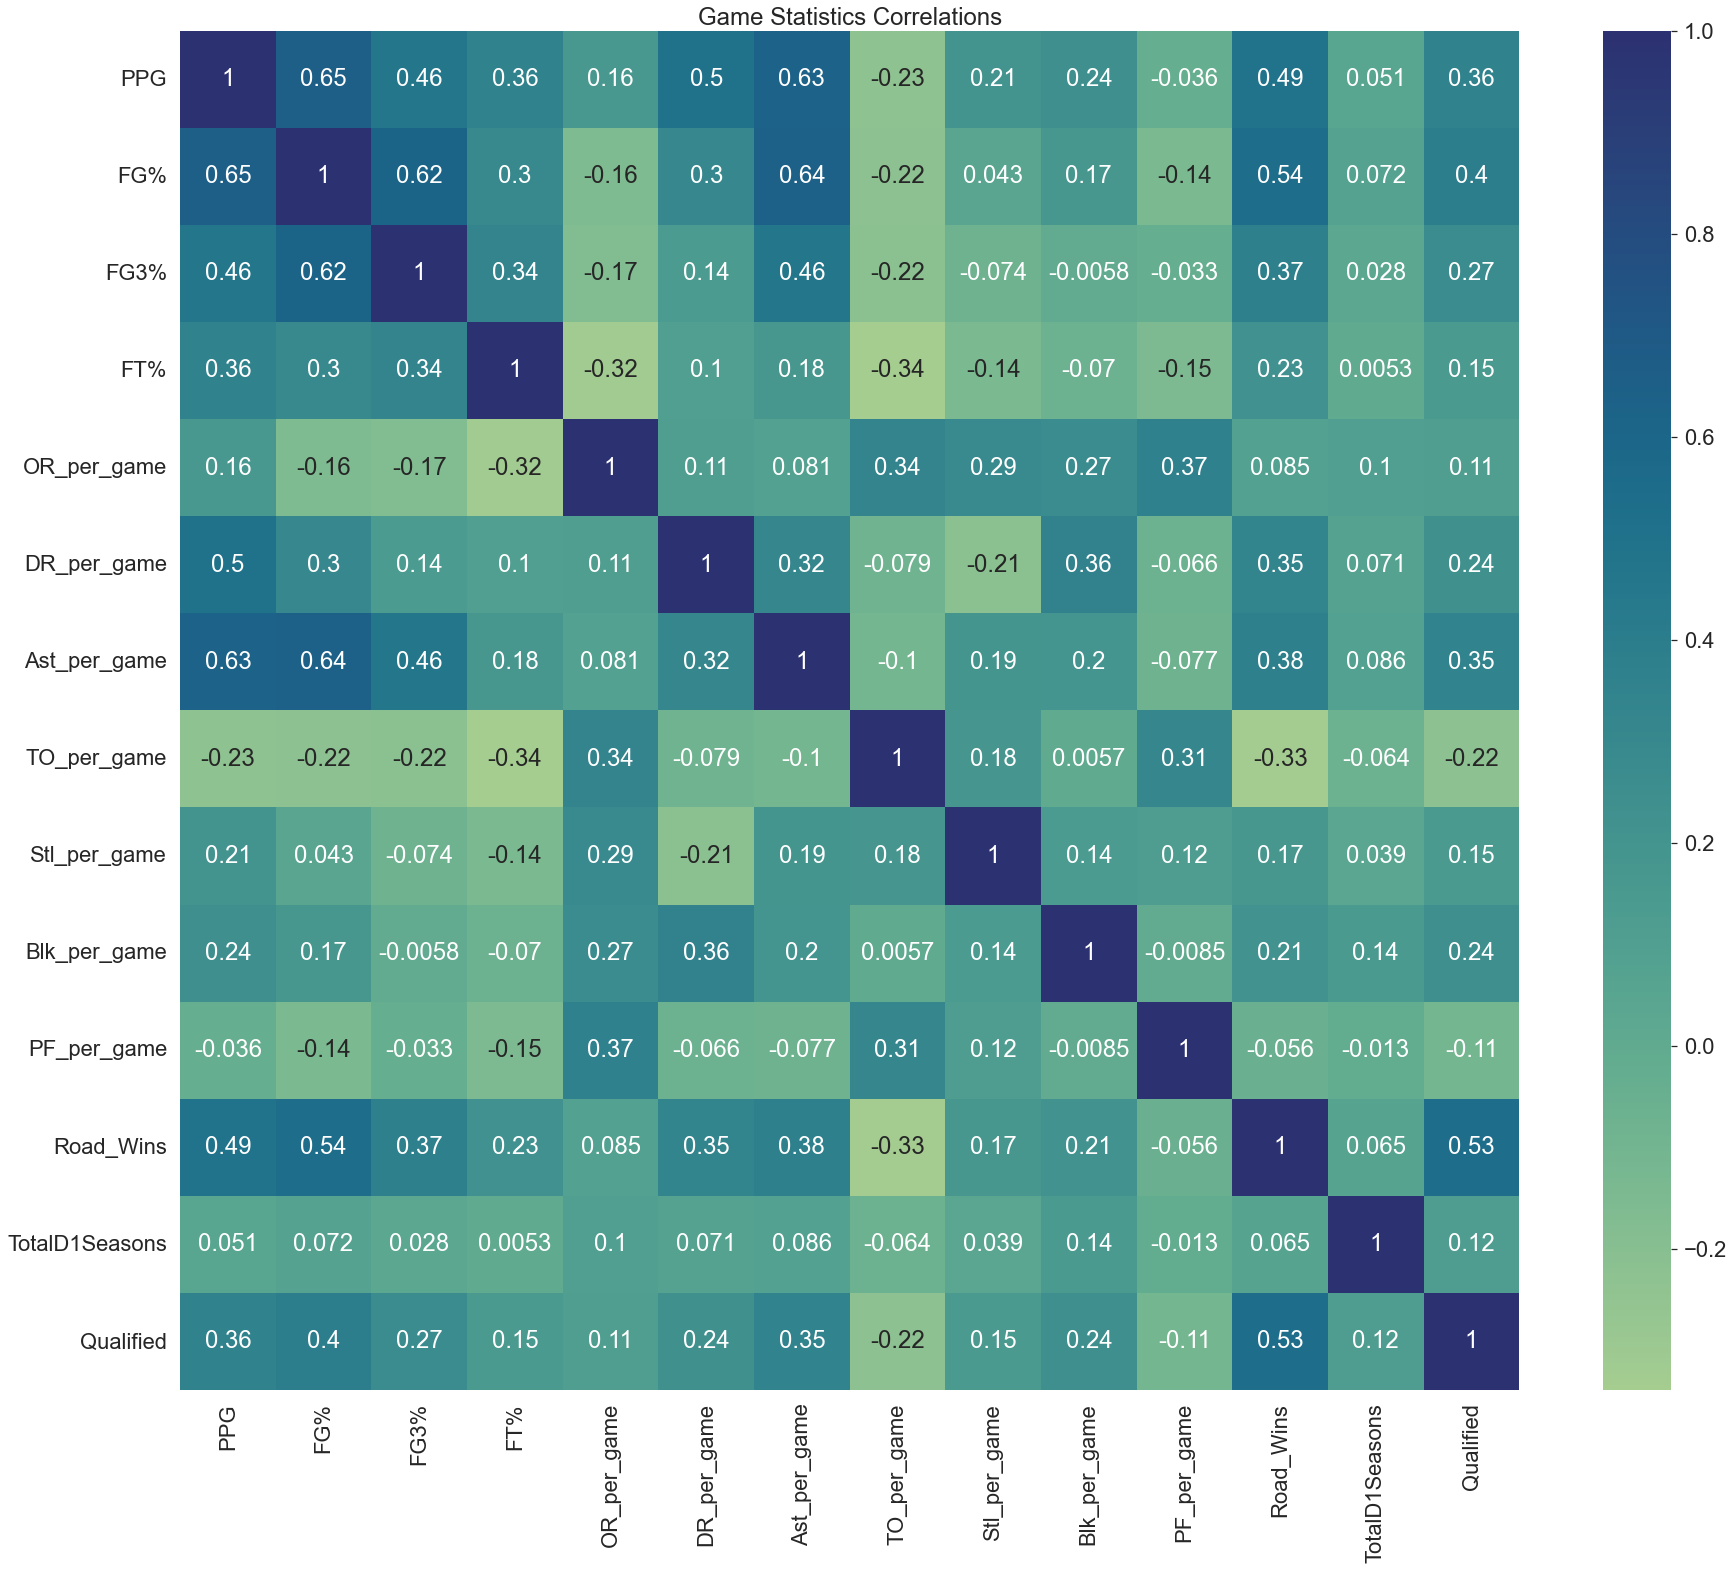

In [6]:
# Creating a list of numerical columns. 
num_cols = ['PPG', 'FG%', 'FG3%', 'FT%', 'OR_per_game', 'DR_per_game','Ast_per_game', 'TO_per_game', 
            'Stl_per_game', 'Blk_per_game','PF_per_game', 'Road_Wins', 'TotalD1Seasons', 'Qualified']

# Calculating correlation matrix
corr_matrix = annual_data_df[num_cols].corr()

# Plotting correlation matrix as heatmap
sns.set(font_scale=2.0)
plt.figure(figsize=(30,25))
sns.heatmap(corr_matrix, cmap = 'crest', annot=True)
plt.title("Game Statistics Correlations", fontsize = 24)
plt.show()

**Observations:**

- Our Target Variable has the highest positive correlations with `Road_Wins`, `FG%`, and `PPG`, which suggests that teams that win more away games, have a higher field goal percentage and score more points tend to perform better overall.


- Our Target Variable is negatively correlated with `TO_per_game` and `PF_per_game`, indicating that turnovers and personal fouls may hinder a team's performance and decrease their chances of winning, which makes absolute sense. 


- `PPG` and `FG%` have the highest positive correlation, suggesting that a team's ability to make shots and score points is a crucial factor in their overall performance.


- `PPG` is also highly correlated with `Ast_per_game`, indicating that teams that have more assists tend to score more points. This may be due to the fact that assists often lead to higher quality shots and more efficient scoring opportunities. Players who are able to make good passes and create scoring opportunities for their teammates can increase their team's overall scoring ability, which is reflected in the positive correlation between these 2 variables. 


- Some variables are negatively correlated with each other, such as `TO_per_game` with `FT%`, which suggests that teams that commit fewer turnovers tend to have a higher free throw percentage, and vice versa. This could be because teams that commit fewer turnovers tend to have better ball control and decision-making skills, which could lead to better shot selection and more opportunities to score free throws. Additionally, teams with higher free throw percentages may prioritize taking care of the ball and limiting turnovers in order to maintain their lead and secure the win.

**Barplot of Conferences Qualification Rate over the past 5 years.**

- We will create a barplot of qualification rates per conference from 2017 to 2022 to investigate whether a team's conference affiliation can predict their likelihood of qualifying for the tournament. By analyzing the data, we can detect any trends or patterns in the qualification rates for each conference over the past five years. If certain conferences consistently have higher qualification rates, it may suggest that conference membership (variable: `ConfAbbrev`) is a good predictor of qualification. On the other hand, if there is no significant difference in qualification rates between conferences, it may indicate that conference affiliation is not a strong predictor of qualification.

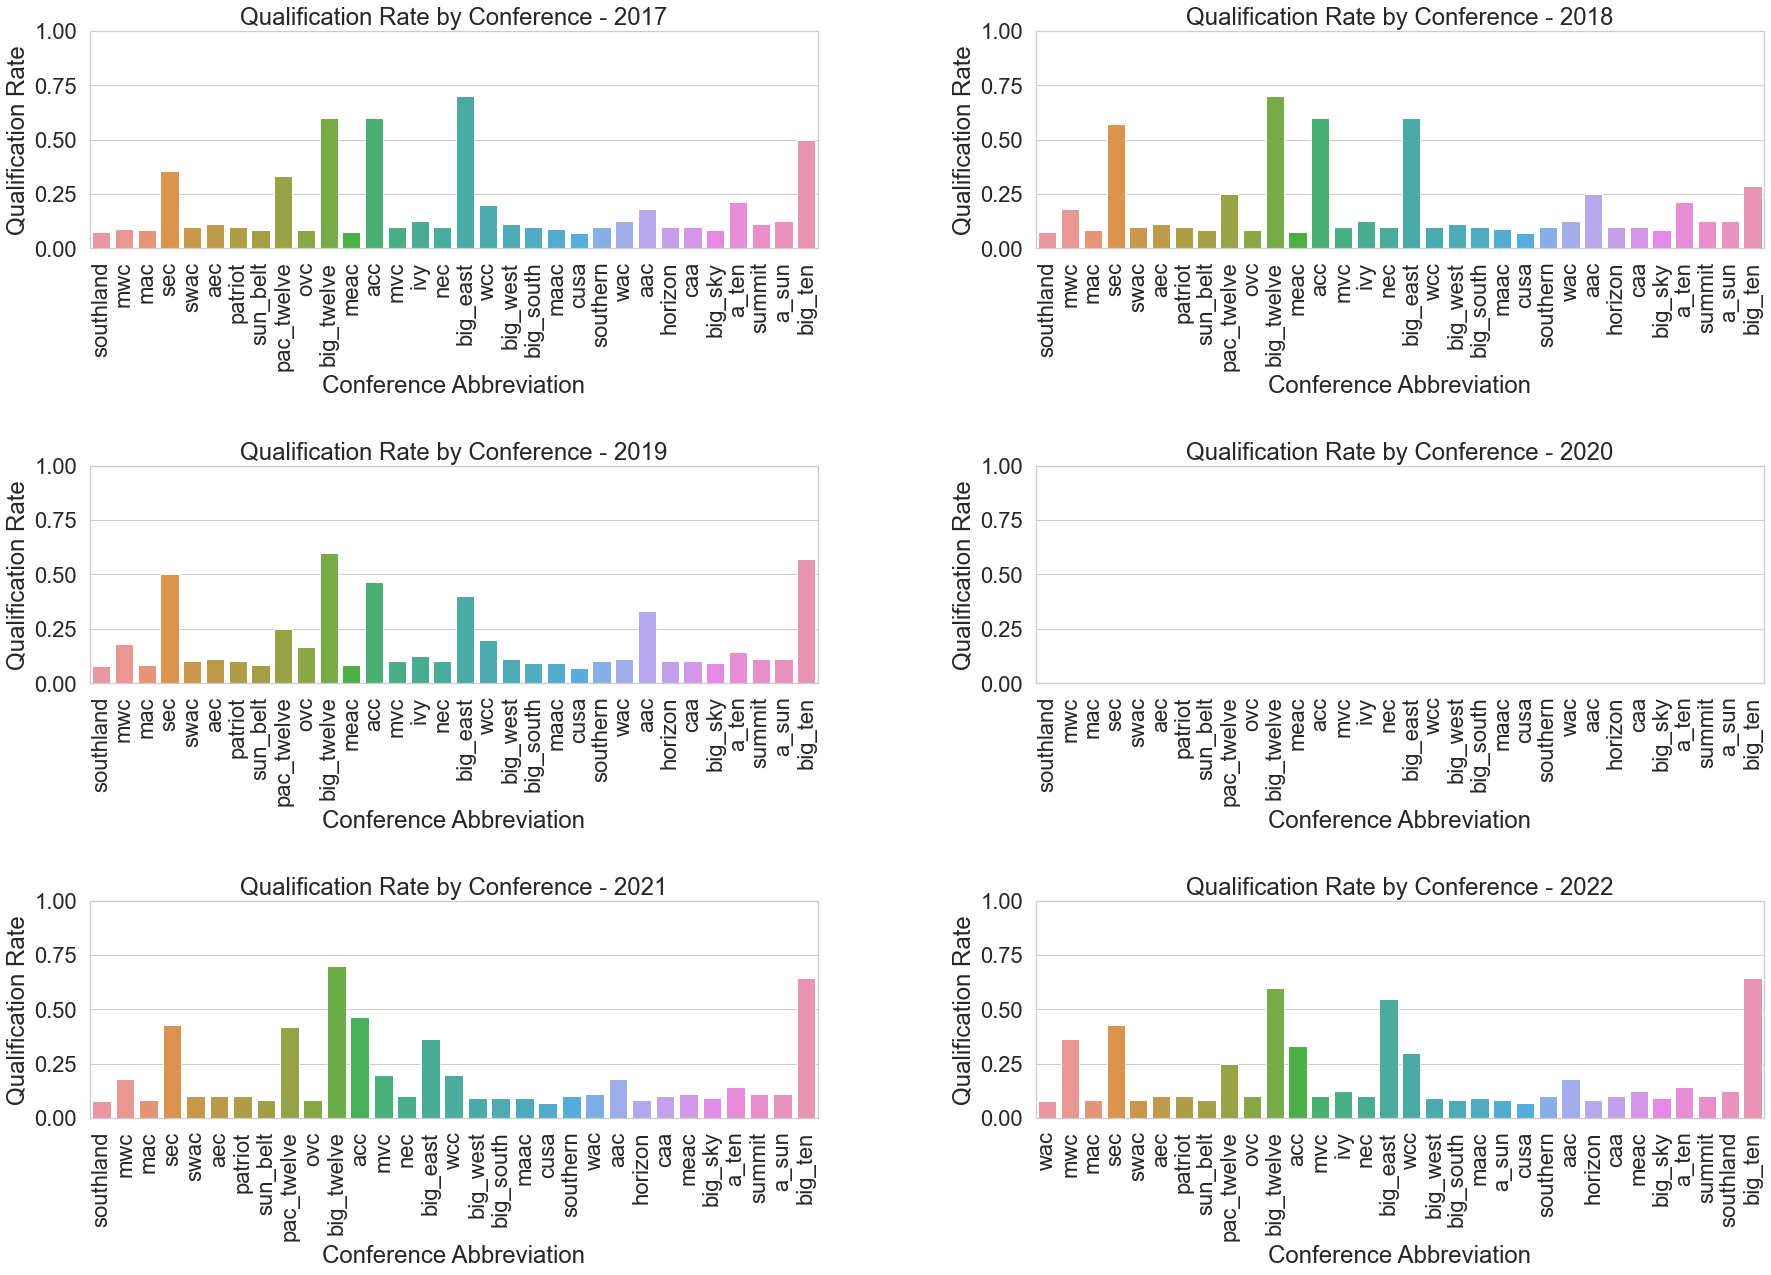

In [7]:
# Filter the data for the past 6 years
past_6_years = annual_data_df[(annual_data_df['Season'] >= 2017) & (annual_data_df['Season'] <= 2022)]

# Set the style of the plot
sns.set_style("whitegrid")

# Create a new figure with the specified size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30,20))

# Loop through each year and plot the qualification rate for each conference in each subplot
for i, year in enumerate(sorted(past_6_years['Season'].unique())):
    ax = axes[i//2, i%2]
    data = past_6_years[past_6_years['Season']==year]
    sns.barplot(x="ConfAbbrev", y="Qualified", data=data, errorbar=None, ax=ax)
    ax.set_title("Qualification Rate by Conference - {}".format(year))
    ax.set_xlabel("Conference Abbreviation")
    ax.set_ylabel("Qualification Rate")
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1.0, wspace=0.3)

# Show the plot
plt.show() 

**Observations**

- The barplots indicate that over the past five years (2017-2021), certain conferences - including the 'SEC', 'PAC_TWELVE', 'BIG_TWELVE', 'ACC', 'BIG_EAST', and 'BIG_TEN' mainly - have consistently produced higher qualification rates. These findings suggest that conference membership could be a useful predictor of a team's likelihood of qualifying for the tournament.


- It is important to note that our analysis may be limited by the absence of 2020 data due to the COVID-19 pandemic, which may affect the generalizability of our findings. Nevertheless, the trend observed in previous years remains consistent with the same set of conferences consistently having higher qualification rates. 

### Data Pre-processing

#### Feature Encoding

To use categorical variables in our machine learning model, we need to encode them into numerical values. For our dataset, we have two categorical variables - `ConfAbbrev` and `CoachName` that we will encode using the LabelEncoder.

In [8]:
# Creating a list of column names to encode
cols_to_encode = ['ConfAbbrev','CoachName']

# Instantiating the LabelEncoder object
le = LabelEncoder()

# Looping through the columns to encode and apply label encoding
for col in cols_to_encode:
    annual_data_df[col] = le.fit_transform(annual_data_df[col])

# Veryfing that the columns were properly encoded 
for col in cols_to_encode:
    print(col, annual_data_df[col].nunique())

ConfAbbrev 36
CoachName 969


#### Feature Scaling

To prepare our numerical variables for modeling, we will use the PowerTransformer scaler to scale the data. The choice of this scaler was determined through a pipeline analysis, which found it to be the most appropriate one for our data.

In [9]:
# Creating a list of the columns to scale
num_cols = ['PPG', 'FG%', 'FG3%', 'FT%', 'OR_per_game', 'DR_per_game','Ast_per_game', 'TO_per_game', 
            'Stl_per_game', 'Blk_per_game','PF_per_game', 'Road_Wins', 'TotalD1Seasons']

# Initializing the scaler object
scaler = PowerTransformer()

# Fitting the scaler object on the numerical columns
scaler.fit(annual_data_df[num_cols])

# Transforming the numerical columns
annual_data_df[num_cols] = scaler.transform(annual_data_df[num_cols])
annual_data_df.head()

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,CoachName,Qualified
0,2003,1102,-2.189919,1.660529,1.297951,-1.209660,-3.027137,-3.411210,0.037876,-1.358660,-0.309035,-1.251867,0.299997,-0.905769,22,Air Force,0.488066,464,0
1,2003,1103,1.624737,2.041626,-0.092757,1.072969,-0.288553,-1.836602,1.056053,-0.199599,0.473917,-1.251867,0.773974,-0.549829,18,Akron,0.488066,183,0
2,2003,1104,-0.082377,-0.612826,-0.792304,0.281999,1.730477,0.184077,-0.511689,-0.199599,0.473917,0.695282,-0.127217,-0.549829,28,Alabama,0.488066,589,1
3,2003,1105,0.434062,-1.365254,0.603939,0.281999,1.730477,-0.313566,1.056053,2.651748,1.801802,-1.251867,0.773974,-1.303446,33,Alabama A&M,-2.260126,951,0
4,2003,1106,-0.952006,-0.612826,0.255937,-1.209660,0.705334,0.184077,-0.511689,1.784032,1.171760,-0.176502,-0.127217,-0.223964,33,Alabama St,0.488066,784,0


#### Creating the training and testing datasets 

In [10]:
# Creating Training and Testing datasets 
training_dataset = annual_data_df[annual_data_df['Season'] < 2023]

testing_dataset = annual_data_df[annual_data_df['Season'] == 2023]

In [11]:
# Printing first 5 rows of training dataset
training_dataset.head()

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,CoachName,Qualified
0,2003,1102,-2.189919,1.660529,1.297951,-1.209660,-3.027137,-3.411210,0.037876,-1.358660,-0.309035,-1.251867,0.299997,-0.905769,22,Air Force,0.488066,464,0
1,2003,1103,1.624737,2.041626,-0.092757,1.072969,-0.288553,-1.836602,1.056053,-0.199599,0.473917,-1.251867,0.773974,-0.549829,18,Akron,0.488066,183,0
2,2003,1104,-0.082377,-0.612826,-0.792304,0.281999,1.730477,0.184077,-0.511689,-0.199599,0.473917,0.695282,-0.127217,-0.549829,28,Alabama,0.488066,589,1
3,2003,1105,0.434062,-1.365254,0.603939,0.281999,1.730477,-0.313566,1.056053,2.651748,1.801802,-1.251867,0.773974,-1.303446,33,Alabama A&M,-2.260126,951,0
4,2003,1106,-0.952006,-0.612826,0.255937,-1.209660,0.705334,0.184077,-0.511689,1.784032,1.171760,-0.176502,-0.127217,-0.223964,33,Alabama St,0.488066,784,0


In [12]:
# Printing first 5 rows of test dataset
testing_dataset.head()

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,CoachName,Qualified
6892,2023,1101,0.262344,0.142355,-0.092757,0.805977,-1.246675,-1.836602,1.056053,-0.762148,1.171760,-1.251867,1.297240,-0.549829,34,Abilene Chr,-2.311663,103,0
6893,2023,1102,-0.428855,0.900174,0.603939,0.542319,-2.162726,-1.323631,1.056053,-1.358660,-0.309035,0.695282,-0.510181,-0.549829,22,Air Force,0.488066,464,0
6894,2023,1103,0.776251,0.142355,0.255937,1.343291,-1.246675,-0.313566,0.037876,-1.358660,-0.309035,-0.176502,-0.851400,0.363222,18,Akron,0.488066,477,0
6895,2023,1104,2.129274,0.520941,-0.092757,0.805977,0.204234,3.080300,1.056053,0.333154,-0.309035,1.433006,0.299997,2.030056,28,Alabama,0.488066,688,1
6896,2023,1105,-0.255392,-0.235572,0.255937,-1.209660,-0.772425,-1.323631,-0.511689,0.333154,1.171760,0.695282,0.299997,0.078845,33,Alabama A&M,-2.260126,701,0


In [13]:
# Creating X_train, y_train, X_test, and y_test

X_train = training_dataset.drop(['Qualified'], axis = 1)
y_train = pd.DataFrame({'Qualified': training_dataset['Qualified']})

X_test = testing_dataset.drop(['Qualified'], axis = 1)
y_test = pd.DataFrame({'Qualified': testing_dataset['Qualified']})

In [14]:
# Printing y_test
y_test

,Qualified
6892,0
6893,0
6894,0
6895,1
6896,0
...,...
7250,0
7251,0
7252,0
7253,0


#### Dropping irrelevant columns 

The following columns are not relevant to our model so we will drop them: 
- `TeamName`: This column contains the team name, which is not useful for the prediction task as it is not a predictor of whether a team will qualify for the NCAA tournament.
- `Team`: This column contains the teamID, which is not useful for the prediction task as it is not a predictor of whether a team will qualify for the NCAA tournament.

- `Season`: Although this column provides information about the year in which the games took place, it does not contain any useful information for predicting the performance of the teams in the tournament.

In [15]:
X_train = X_train.drop(['TeamName', 'Team', 'Season'], axis = 1)
X_test = X_test.drop(['TeamName', 'Team', 'Season'], axis = 1)

#### Checking for Class Imbalances 

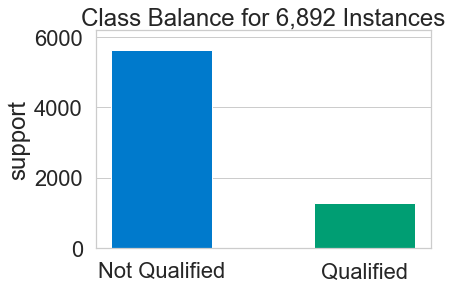

<AxesSubplot: title={'center': 'Class Balance for 6,892 Instances'}, ylabel='support'>

In [16]:
# Instantiating the visualizer object and setting color map
visualizer = ClassBalance(labels=["Not Qualified", "Qualified"], colors=["#007acc", "#009e73"])

# Fitting the target data to object
visualizer.fit(y_train['Qualified'])
visualizer.show()

As we can see, our dataset is not balanced at all. We have a huge number of the `Not Qualified` class compared to the `Qualified` class. We will resample using SMOTE:

- **SMOTE** generates synthetic samples of the minority class, which can be effective when there is a class imbalance and the minority class is not well-represented in the training data. SMOTE can help to balance the dataset and improve the performance of the model on the minority class. In our case, SMOTE is a good choice for imbalanced datasets since the minority class has a small number of instances and the dataset has a sufficient number of features to create meaningful synthetic sample. 

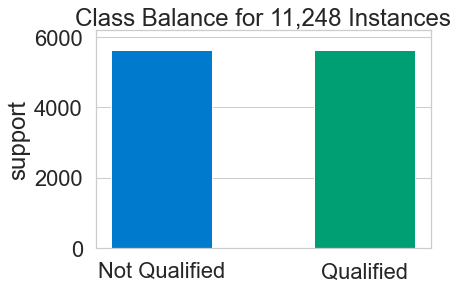

<AxesSubplot: title={'center': 'Class Balance for 11,248 Instances'}, ylabel='support'>

In [17]:
# Instantiating the SMOTE object 
seed = 17
sm = SMOTE(random_state=seed)

# Fitting the training data to the sampler 
X_train, y_train = sm.fit_resample(X_train, y_train)

# Instantiating the visualizer
visualizer = ClassBalance(labels=["Not Qualified", "Qualified"], colors=["#007acc", "#009e73"])

# Fitting the target data to object
visualizer.fit(y_train['Qualified'])
visualizer.show()

Our dataset is now ready to go! 

We will train it using Logistic Regression, Gaussian Naive Bayes, Random Forest Classifier, and XGBoost Classifier. 

### Classification Models 

**Logistic Regression** 

Best parameter:  {'solver': 'liblinear'}
Best score:  0.8527713720838277


               precision    recall  f1-score   support

Not Qualified       0.93      0.85      0.89       295
    Qualified       0.53      0.74      0.61        68

     accuracy                           0.83       363
    macro avg       0.73      0.79      0.75       363
 weighted avg       0.86      0.83      0.84       363



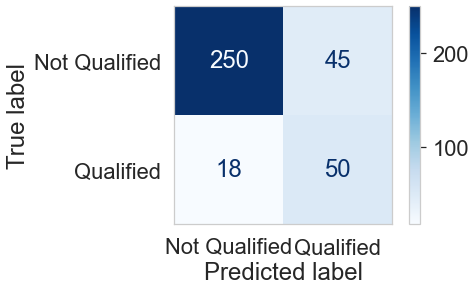

In [102]:
# Instantiating the logistic Regression Model and defining the hyperparameters grid
LR = LogisticRegression(max_iter=100000)

# Defining the tuning parameters 
parameters = {'solver'  : ['lbfgs', 'liblinear','newton-cg','sag','saga']
             }

# Tuning the model using GridSearchCV with CV 10 
LR_tuned = GridSearchCV(LR,                        
                       param_grid = parameters,   
                       scoring='accuracy',        
                        cv=10)   

# Fitting the resampled training data to the tuned model
LR_tuned.fit(X_train,y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameter: ", LR_tuned.best_params_)
print("Best score: ", LR_tuned.best_score_)

# Getting predictions on the test set using the tuned model
LR_best_estimator = LR_tuned.best_estimator_         # getting the best estimator from GridSearchCV
y_pred_LR_tuned = LR_best_estimator.predict(X_test)  # getting the predicted classes for X_test

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_LR_tuned, digits= 2, target_names=['Not Qualified', 'Qualified']))

# Calculating the confusion matrix for the LR tuned
cm_LR_tuned = confusion_matrix(y_test, y_pred_LR_tuned)

# Creating a ConfusionMatrixDisplay object 
display_cm_LR_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_LR_tuned, display_labels=['Not Qualified', 'Qualified'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_LR_tuned.plot(cmap='Blues')
plt.grid(False)

**Observations:**
    
- The model did perform quite well. It has an overall accuracy of 0.83. 

- The precision for the `Not Qualified` class is 0.93 which means that out of all the instances the model predicted as  `Not Qualified` , 93% of them are truly  `Not Qualified`. The recall for the  `Not Qualified`class is 0.85 which means that out of all the instances that are truly  `Not Qualified`, the model correctly identified 85% of them.

- For the `Qualified` class, the precision is 0.53 which means that out of all the instances the model predicted as  `Qualified`, only 53% of them are truly `Qualified`. The recall for the `Qualified` class is 0.74 which means that out of all the instances that are truly `Qualified`, the model correctly identified 74%  of them.

- This suggests that the model has more difficulty identifying instances of the `Qualified` class compared to the ` Not Qualified` class. The F1-score, which is the harmonic mean of precision and recall, is also relatively low for the `Qualified` class (0.61), indicating lower performance in terms of both precision and recall.

**Gaussian Naive Bayes**

Best parameters:  {'var_smoothing': 1e-06}
Best score:  0.8300987742190589


               precision    recall  f1-score   support

Not Qualified       0.96      0.75      0.84       295
    Qualified       0.44      0.85      0.58        68

     accuracy                           0.77       363
    macro avg       0.70      0.80      0.71       363
 weighted avg       0.86      0.77      0.79       363



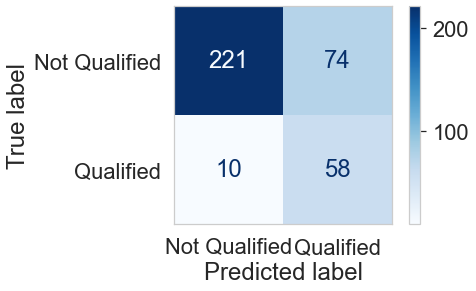

In [103]:
# Instantiating a Gaussian Naive Bayes model and setting up the parameter grid
GNB = GaussianNB()
parameters = {
    'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001]
}

# Creating the GridSearchCV object with cross validation 10
GNB_tuned = GridSearchCV(GNB, parameters, cv=10, scoring='accuracy')

# Fitting the GridSearchCV object to the data
GNB_tuned.fit(X_train, y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameters: ", GNB_tuned.best_params_)
print("Best score: ", GNB_tuned.best_score_)

# Getting the best estimator
GNB_best_estimator = GNB_tuned.best_estimator_

# Using the best estimator to make predictions on the test set
y_pred_GNB_tuned = GNB_best_estimator.predict(X_test)

# Printing the classification report 
print("\n")
print(classification_report(y_test, y_pred_GNB_tuned, digits=2, target_names=['Not Qualified', 'Qualified']))

# Creating a ConfusionMatrixDisplay object
cm_GNB_tuned = confusion_matrix(y_test,y_pred_GNB_tuned)

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_GNB_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_GNB_tuned, display_labels=['Not Qualified', 'Qualified'])
display_cm_GNB_tuned.plot(cmap='Blues')
plt.grid(False)

**Observations:**
    
- The model did perform quite well too but not better than the Logistic Regression. It has an overall accuracy of 0.77. 

- The precision for the `Not Qualified` class is 0.96 which means that out of all the instances the model predicted as  `Not Qualified` , 96% of them are truly  `Not Qualified`. The recall for the  `Not Qualified`class is 0.75 (lower than the Logistic Regression) which means that out of all the instances that are truly  `Not Qualified`, the model correctly identified 75% of them.

- For the `Qualified` class, the precision is 0.44 which means that out of all the instances the model predicted as  `Qualified`, only 44% of them are truly `Qualified`. The recall for the `Qualified` class is 0.85 (Higher than the Logistic Regression) which means that out of all the instances that are truly `Qualified`, the model correctly identified 85%  of them.

- This suggests that the Gaussian model still has more difficulty identifying instances of the `Qualified` class compared to the ` Not Qualified` class. The F1-score, which is the harmonic mean of precision and recall, is also relatively low for the `Qualified` class (0.58), indicating a lower performance in terms of both precision and recall.

#### Random Forests Classifier 

Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}
Best Model Train Accuracy:  1.0
Best Model Test Accuracy:  0.8705234159779615


               precision    recall  f1-score   support

Not Qualified       0.91      0.93      0.92       295
    Qualified       0.67      0.62      0.64        68

     accuracy                           0.87       363
    macro avg       0.79      0.77      0.78       363
 weighted avg       0.87      0.87      0.87       363



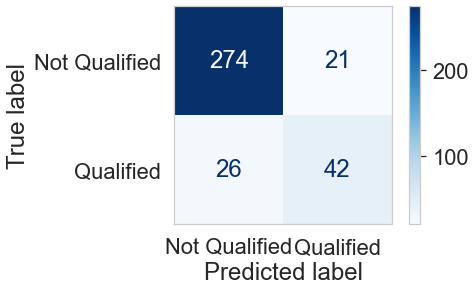

In [104]:
# Creating a new RandomForestClassifier with default parameters
RFC = RandomForestClassifier(random_state=seed)

# Defining parameter grid
parameters = {'max_depth': [10,30,50], 
              'n_estimators': [50, 100, 150, 200, 300],
              'max_features': ('sqrt','log2')
             }

# Performing grid search using 10-fold CV
RFC_tuned = GridSearchCV(RFC, parameters, cv=10)

# Fitting the grid search to the data
RFC_tuned.fit(X_train, y_train.values.ravel())

# Print the best parameters
print("Best Parameters: ", RFC_tuned.best_params_ )

# Creating a new RandomForestClassifier with the best parameters
RFC_best = RandomForestClassifier(n_estimators=RFC_tuned.best_params_['n_estimators'], 
                                   max_depth=RFC_tuned.best_params_['max_depth'], 
                                   max_features=RFC_tuned.best_params_['max_features'], 
                                   random_state=seed)

# Fitting the classifier to the data
RFC_best.fit(X_train, y_train.values.ravel())

# Printing train and test accuracy scores
train_accuracy_rfc_best = RFC_best.score(X_train, y_train)
print("Best Model Train Accuracy: ", train_accuracy_rfc_best)

test_accuracy_rfc_best = RFC_best.score(X_test, y_test)
print("Best Model Test Accuracy: ", test_accuracy_rfc_best)

# Predicting test set results
y_pred_RFC = RFC_best.predict(X_test)

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_RFC, digits=2, target_names=['Not Qualified', 'Qualified']))

# Calculating the confusion matrix for the RFC model
cm_RFC = confusion_matrix(y_test, y_pred_RFC)

# Creating a ConfusionMatrixDisplay object 
display_cm_RFC = ConfusionMatrixDisplay(confusion_matrix=cm_RFC, display_labels=['Not Qualified', 'Qualified'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_RFC.plot(cmap='Blues')
plt.grid(False)

**Observations:**
    
- The Random Forest Classifier model performed better than the Logistic Regression and the Gaussian Naive bayes models in terms of accuracy. It has an overall accuracy of 0.87. 

- The precision for the `Not Qualified` class is 0.91 which means that out of all the instances the model predicted as  `Not Qualified` , 91% of them are truly  `Not Qualified`. The recall for the  `Not Qualified` class is 0.93 which means that out of all the instances that are truly  `Not Qualified`, the model correctly identified 93% of them.

- For the `Qualified` class, the precision is 0.67 which means that out of all the instances the model predicted as  `Qualified`, 67% of them are truly `Qualified`. The recall for the `Qualified` class is 0.62 which means that out of all the instances that are truly `Qualified`, the model only correctly identified 62%  of them.

- This model like the two others still has more difficulty identifying instances of the `Qualified` class compared to the ` Not Qualified` class. The F1-score, which is the harmonic mean of precision and recall, is the highest for the `Not Qualified` class (0.93) and that of the `Qualified` class although still low is the highest of all three models (0.64).

Now, let's take a look at the Feature Importance according to our Random Forest Classifier. 

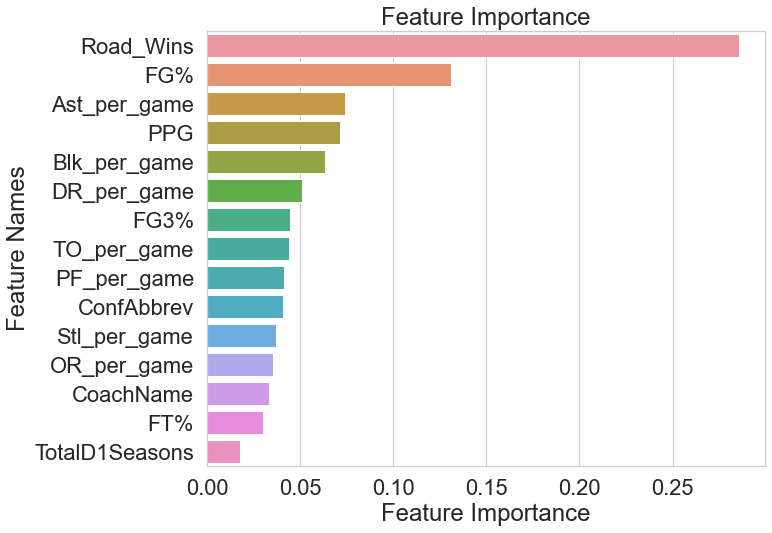

In [106]:
# Defining feature names
feature_names = X_train.columns.tolist()

# Getting feature importances
fimp = RFC_best.feature_importances_

# Putting them into a dataframe
fimp = pd.DataFrame({'Features': feature_names, 'Importance': fimp})
fimp.sort_values(by=['Importance'], ascending=False, inplace=True)
fimp

# Plotting the data 
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Features', data=fimp)
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

**Observations:**
- The graph indicates that `Road_Wins` is the most crucial factor. This aligns with the positive high correlation found between `Road_Wins` and our target variable `Qualified` in the heatmap plotted above . 


- The heatmap also revealed that `FG%`, `PPG`, and `Ast_per_Game` had the highest correlation with our target variable, following `Road_Wins`. The RFC feature importance plot above further confirms these correlations by highlighting these three variables as the most significant features after `Road_Wins`. 


- `TotalD1Seasons` seems to be the least important factor according to the RFC.


- `ConfAbbrev` seems to be a quite important feature as well. Multiple game statistics weight more than this variable but we can see that it is the most important categorical feature and actually seems to be more important than Steals, Offensive rebounds and Free Throws. 

#### XGBoost Classifier

XGBoost (Extreme Gradient Boosting) Classifier is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. We chose it because it is a popular machine learning algorithm used for supervised learning problems, including classification and regression tasks, and is widely used in **sports analytics**. XGBoost uses an ensemble learning approach where multiple decision trees are built sequentially and their results are combined to make the final prediction. It is known for its accuracy, speed, and scalability. 

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}


               precision    recall  f1-score   support

Not Qualified       0.93      0.94      0.93       295
    Qualified       0.71      0.69      0.70        68

     accuracy                           0.89       363
    macro avg       0.82      0.81      0.82       363
 weighted avg       0.89      0.89      0.89       363



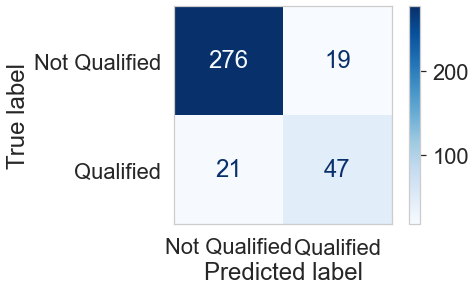

In [18]:
# Defining the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=seed)

# Defining the hyperparameters to tune and their values
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Using GridSearchCV to find the best hyperparameters
xgb_tuned = GridSearchCV(xgb_clf, parameters, cv=10)
xgb_tuned.fit(X_train, y_train.values.ravel())

# Getting the best hyperparameters and fit the classifier with them
best_params = xgb_tuned.best_params_
xgb_best = xgb.XGBClassifier(**best_params, random_state=seed)
xgb_best.fit(X_train, y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameters: ", best_params)

# Making predictions on test data
y_pred_xgb = xgb_best.predict(X_test)

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_xgb, digits=2, target_names=['Not Qualified', 'Qualified']))

# Calculating the confusion matrix for the RFC model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Creating a ConfusionMatrixDisplay object 
display_cm_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Qualified', 'Qualified'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_xgb.plot(cmap='Blues')
plt.grid(False)

**Observations:**
    
- The Extreme Gradient Boost Classifier model performed better than all four models in terms accuracy. It has an overall accuracy of 0.89. 

- The precision for the `Not Qualified` class is 0.93 which means that out of all the instances the model predicted as  `Not Qualified` , 93% of them are truly  `Not Qualified`. The recall for the  `Not Qualified` class is 0.94 which means that out of all the instances that are truly  `Not Qualified`, the model correctly identified 94% of them.

- For the `Qualified` class, the precision is 0.71 which means that out of all the instances the model predicted as  `Qualified`, 71% of them are truly `Qualified`. The recall for the `Qualified` class is 0.69 which means that out of all the instances that are truly `Qualified`, the model correctly identified 69%  of them.

- This model like the three others still has more difficulty identifying instances of the `Qualified` class compared to the ` Not Qualified` class. 

- Among all four models, this model has the highest f1-score for the `Not Qualified` class (0.93) and for the `Qualified` class (0.70).

### So, who makes it into the tournament for sure ?

Our best model predicted **47** right teams out of **68** that would make it to the tournament. Below are the teams that were predicted to make it to the tournament and who actually did:

In [21]:
# Converting y_pred to a pandas Series
Qualified_pred = pd.Series(y_pred_xgb)

# Adding the predicted result to a dataframe which actual presentation
result = pd.concat([testing_dataset.reset_index(drop=True), Qualified_pred], axis=1)
result.columns.values[-1] = 'Qualified_pred'

# Printing dataframe of the teams model predicted to qualify 
qualified = result[(result['Qualified'] == 1) & (result['Qualified_pred'] == 1)][['Team', 'TeamName']]
qualified.reset_index(drop=True)

,Team,TeamName
0,1104,Alabama
1,1112,Arizona
2,1113,Arizona St
3,1129,Boise St
4,1158,Col Charleston
5,1159,Colgate
6,1163,Connecticut
7,1166,Creighton
8,1181,Duke
9,1202,Furman


### ROC and AUC 

For this next part, we are going to compare all four classifiers using ROC and AUC.

In [118]:
# Storing the values in different variables so we can graph them 

# Logistic Regression
lr_auc= roc_auc_score(y_test, LR_best_estimator.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, LR_best_estimator.predict_proba(X_test)[:, 1])

# Gaussian Naive Bayes  
gnb_auc = roc_auc_score(y_test, GNB_best_estimator.predict_proba(X_test)[:, 1])
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(y_test, GNB_best_estimator.predict_proba(X_test)[:, 1])

# Random forest Classifier
rfc_auc = roc_auc_score(y_test, RFC_best.predict_proba(X_test)[:, 1])
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, RFC_best.predict_proba(X_test)[:, 1])

# XGBoost Classifier
xgb_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_best.predict_proba(X_test)[:, 1])

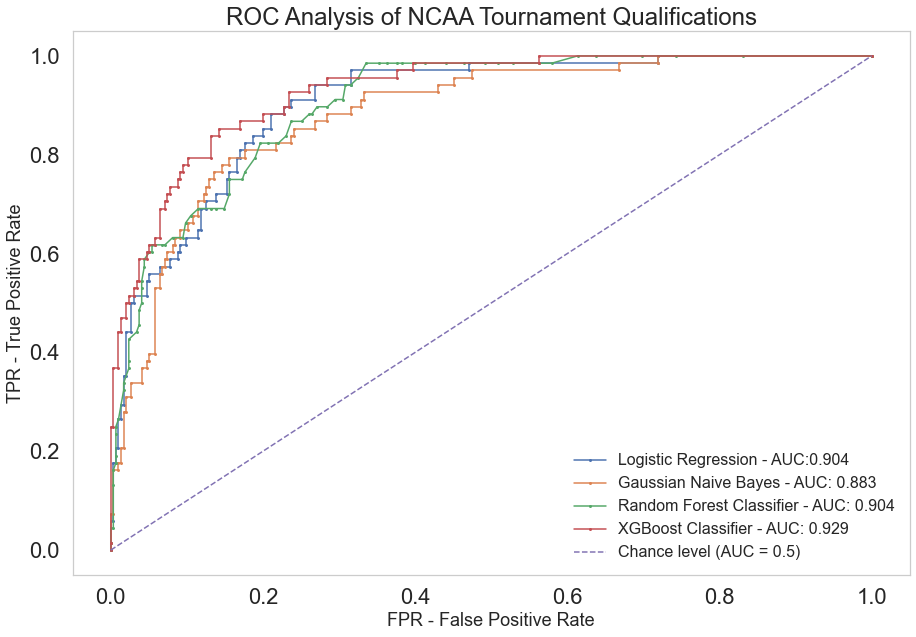

In [129]:
# Using the values to plot ROC for all four models 
plt.figure(figsize=(15, 10))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression - AUC:%.3f' % lr_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes - AUC: %.3f' % gnb_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier - AUC: %.3f' % rfc_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost Classifier - AUC: %.3f' % xgb_auc)
plt.plot([0, 1], [0, 1], "--", label="Chance level (AUC = 0.5)")
plt.xlabel('FPR - False Positive Rate', fontsize=18)
plt.ylabel('TPR - True Positive Rate', fontsize=18)
plt.title('ROC Analysis of NCAA Tournament Qualifications',  fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(False)
plt.show()

**Observations and Model Selection**

- Based on the ROC curve analysis, it appears that the **XGBoost Classifier** has the highest AUC value of 0.929, indicating that it has the best overall performance in distinguishing between `Qualified` and `Not Qualified` teams for the NCAA Tournament. Additionally, the classification report shows that it achieved the highest precision, recall, and F1-scores. 


- Therefore, we can select XGBoost as the best model for predicting NCAA tournament qualifications. Its strong performance on the test data suggests that it is likely to generalize well to new, unseen data.

# 1b. Which teams will win each round of the tournament bracket?

**Outline to answer question 1b:**

1. Datasets creation: We will need three different datasets for this question.
- Training dataset: This dataset will contain all games from 2003 to 2022, including regular and tournament games. Our models will be trained on this dataset.
- Test dataset: This dataset will contain all games from the 2023 tournament. Based on the teams that have qualified this year, we will create a dataframe that contains all potential game matchups. Then, we will filter this dataframe to only include games that actually happened this year. This will be the dataset our models' performances will be tested on.
- Bracket prediction dataset: Once we have selected our best model, we will apply it to a dataset containing all potential game matchups and see what the predicted results are. We will also use the model's predictions to create a bracket based on the predicted outcomes.

2. Data Pre-processing: Once our datasets are ready, we will proceed to data pre-processing. We will drop any irrelevant/redundant columns, encode categorical variables, scale our features to a similar range. 


3. Model Selection: Since we are performing a classification task, we will consider Gaussian Naive Bayes, Logistic Regression, Random Forest Classifier, and XGBoost Classifier. We will tune the hyperparameters of the algorithm using cross-validation/GridsearchCV to optimize their performance.


4. Model Training: After we split our preprocessed data into a training set and a testing set, the training set will be used to train our machine learning models, and the testing set will be used to evaluate their performance. We will use data from 2003 to 2022 for training (X_train and y_train) and 2023 actual tournament data for testing (X_test and y_test).


- Model Evaluation and Validation: We will evaluate the performance of our models on the testing set using metrics such as accuracy, precision, recall, and F1-score. We will also use visualization techniques such as ROC/AUC curves to evaluate the performance of our classification methods. We will choose the best performing model after evaluation.


### Datasets Creation 

In this first part,  we will start by reading in the `annual_team_data` dataset containing team statistics. We will filter this dataset to obtain a subset of teams that have qualified for the 2023 tournament. Using this subset, we will create a new dataframe that lists all possible tournament matchups, along with associated statistics for both TeamA and TeamB. This new dataframe will serve as the basis for creating the test dataset and the tournament brackets dataset.

#### Reading in dataframe of the teams that are qualified for the 2023 tournament
The teams that have qualified for the 2023 tournament are the ones with Seed Number in our final dataframe. We will filter the dataframe to `Season` == 2023 and `Seed` notna()

In [187]:
# Loading the annual_team_data df
annual_df = pd.read_csv("data/annual_team_data.csv")
annual_df.head()

# Filtering for Season 2023 data only
df_2023 = annual_df[annual_df['Season'] == 2023]
df_2023.head()

# Creating a dataframe of the 2023 teams that are qualified 
qualified_teams = df_2023[df_2023['Seed'].notna()]
qualified_teams

,Season,Team,PPG,FG%,FG3%,FT%,OR_per_game,DR_per_game,Ast_per_game,TO_per_game,Stl_per_game,Blk_per_game,PF_per_game,Road_Wins,ConfAbbrev,TeamName,TotalD1Seasons,Seed,CoachName,Qualified
6895,2023,1104,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats,1
6902,2023,1112,83,50,38,71,9,27,19,13,6,3,17,13,pac_twelve,Arizona,39,X02,tommy_lloyd,1
6903,2023,1113,70,41,31,69,9,24,14,12,7,5,19,12,pac_twelve,Arizona St,39,Z11a,bobby_hurley,1
6906,2023,1116,74,48,32,69,9,24,13,13,8,5,19,6,sec,Arkansas,39,Z08,eric_musselman,1
6909,2023,1120,73,44,31,70,10,23,14,12,8,5,19,6,sec,Auburn,39,Y09,bruce_pearl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,2023,1433,71,47,35,70,8,23,13,13,9,5,16,12,a_ten,VCU,39,Z12,mike_rhoades,1
7215,2023,1436,72,47,36,70,5,23,14,9,6,3,15,10,aec,Vermont,39,W15,john_becker,1
7217,2023,1438,68,45,35,70,7,23,16,8,7,4,14,10,acc,Virginia,39,X04,tony_bennett,1
7229,2023,1452,76,45,35,74,10,22,13,12,7,3,18,6,big_twelve,West Virginia,39,X09,bob_huggins,1


Above are all 68 teams that have qualified for the NCAA 2023 tournament. 

#### Creating a dataframe containg all potential game matchups. 

Now, we create a dataset that contains all potential tournament matchups. 
The code below generates a dataset of all potential game matchups between the 68 teams that have qualified for a tournament. First, a sample dataframe with the team ID column is created. Then, all possible pairwise combinations of TeamID are generated, and a new dataframe with TeamA and TeamB columns is created. This dataframe is then merged with the `qualified_teams` dataframe to obtain all statistics (FG%, FG3%, FT%, etc...) from every single team. Some columns are renamed, moved, dropped in order to match the order of our `final_df_not_uncoded` dataframe. The resulting dataset is saved to a CSV file called `tourney_matchups`.

In [188]:
# Creating sample dataframe with TeamID column
teams = pd.DataFrame({'TeamID': qualified_teams['Team']})

# Generating all possible pairwise combinations of TeamID column
team_combinations = combinations(teams['TeamID'], 2)

# Creating new dataframe with TeamA and TeamB columns
tournament_matchups = pd.DataFrame(list(team_combinations), columns=['TeamA', 'TeamB'])
tournament_matchups

# Swaping TeamA and TeamB if TeamB has the higher ID number
tournament_matchups.loc[tournament_matchups['TeamA'] < tournament_matchups['TeamB'], ['TeamA', 'TeamB']] = tournament_matchups.loc[tournament_matchups['TeamA'] < tournament_matchups['TeamB'], ['TeamB', 'TeamA']].values

# Merging the two dataframes on the 'Team' column for both TeamA and TeamB
tourney_matchups = pd.merge(tournament_matchups, qualified_teams, left_on='TeamA', right_on='Team', suffixes=('_A', '_B'), how='inner')
tourney_matchups = pd.merge(tourney_matchups, qualified_teams, left_on='TeamB', right_on='Team', suffixes=('_A', '_B'), how='inner')

# Renaming columns to match our final dataframe
tourney_matchups.rename(columns={
    'Season_A': 'A_Season', 'Team_A': 'A_Team', 'PPG_A': 'A_PPG', 'FG%_A': 'A_FG%', 'FG3%_A': 'A_FG3%', 
    'FT%_A': 'A_FT%', 'OR_per_game_A': 'A_OR_per_game', 'DR_per_game_A': 'A_DR_per_game', 'Ast_per_game_A': 'A_Ast_per_game',
    'TO_per_game_A': 'A_TO_per_game', 'Stl_per_game_A': 'A_Stl_per_game', 'Blk_per_game_A': 'A_Blk_per_game',
    'PF_per_game_A': 'A_PF_per_game', 'Road_Wins_A': 'A_Road_Wins', 'ConfAbbrev_A': 'A_ConfAbbrev', 
    'TeamName_A': 'A_TeamName', 'TotalD1Seasons_A': 'A_TotalD1Seasons', 'Seed_A': 'A_Seed', 
    'CoachName_A': 'A_CoachName', 'Qualified_A': 'A_Qualified',
    'Season_B': 'B_Season', 'Team_B': 'B_Team', 'PPG_B': 'B_PPG', 'FG%_B': 'B_FG%', 'FG3%_B': 'B_FG3%', 
    'FT%_B': 'B_FT%', 'OR_per_game_B': 'B_OR_per_game', 'DR_per_game_B': 'B_DR_per_game', 'Ast_per_game_B': 'B_Ast_per_game',
    'TO_per_game_B': 'B_TO_per_game', 'Stl_per_game_B': 'B_Stl_per_game', 'Blk_per_game_B': 'B_Blk_per_game',
    'PF_per_game_B': 'B_PF_per_game', 'Road_Wins_B': 'B_Road_Wins', 'ConfAbbrev_B': 'B_ConfAbbrev', 
    'TeamName_B': 'B_TeamName', 'TotalD1Seasons_B': 'B_TotalD1Seasons', 'Seed_B': 'B_Seed', 
    'CoachName_B': 'B_CoachName', 'Qualified_B': 'B_Qualified',
}, inplace=True)

# Dropping redundant columns 
tourney_matchups.drop(['A_Team', 'B_Team', 'A_Season', 'B_Season', 'A_Qualified', 'B_Qualified'], axis=1, inplace=True)

# Inserting a column "Season" at first position
tourney_matchups.insert(0, 'Season', 2023)

# Inserting a "Win" column at fourth position
tourney_matchups.insert(3, 'Win', np.nan)

# Reading it out
tourney_matchups.to_csv('data/tourney_matchups.csv', index=False)

# Printing a sample 
tourney_matchups

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2023,1112,1104,NaN,83,50,38,71,9,27,19,13,6,3,17,13,pac_twelve,Arizona,39,X02,tommy_lloyd,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
1,2023,1113,1104,NaN,70,41,31,69,9,24,14,12,7,5,19,12,pac_twelve,Arizona St,39,Z11a,bobby_hurley,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
2,2023,1116,1104,NaN,74,48,32,69,9,24,13,13,8,5,19,6,sec,Arkansas,39,Z08,eric_musselman,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
3,2023,1120,1104,NaN,73,44,31,70,10,23,14,12,8,5,19,6,sec,Auburn,39,Y09,bruce_pearl,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
4,2023,1124,1104,NaN,77,45,37,75,10,20,14,12,7,2,17,8,big_twelve,Baylor,39,X03,scott_drew,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2023,1452,1436,NaN,76,45,35,74,10,22,13,12,7,3,18,6,big_twelve,West Virginia,39,X09,bob_huggins,72,47,36,70,5,23,14,9,6,3,15,10,aec,Vermont,39,W15,john_becker
2274,2023,1462,1436,NaN,81,49,40,71,9,26,19,12,7,3,16,10,big_east,Xavier,39,Y03,sean_miller,72,47,36,70,5,23,14,9,6,3,15,10,aec,Vermont,39,W15,john_becker
2275,2023,1452,1438,NaN,76,45,35,74,10,22,13,12,7,3,18,6,big_twelve,West Virginia,39,X09,bob_huggins,68,45,35,70,7,23,16,8,7,4,14,10,acc,Virginia,39,X04,tony_bennett
2276,2023,1462,1438,NaN,81,49,40,71,9,26,19,12,7,3,16,10,big_east,Xavier,39,Y03,sean_miller,68,45,35,70,7,23,16,8,7,4,14,10,acc,Virginia,39,X04,tony_bennett


We now have a dataframe of all potential games. Let's move on to the next step: Data pre-processing

### Data Pre-processing

#### Reading in the `final_df` dataset that has historical games data and merging it with `tourney_matchups`
We read in our final_df dataset. This dataset contains all regular and tournament games from 2002 to 2023. This will be our training dataset.


In [189]:
# Loading our final dataframe
final_df= pd.read_csv("data/final_df_not_encoded")
pd.set_option('display.max_columns', None)

# Dropping column "DayNum" and "TourneyGame" for consistency with this year data 
final_df= final_df.drop(['DayNum', 'TourneyGame'], axis = 1)
final_df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2003,1328,1104,0,71,45,39,71,12,25,14,12,7,4,19,9,big_twelve,Oklahoma,39,W01,kelvin_sampson,69,42,32,71,14,24,12,13,7,4,18,4,sec,Alabama,39,Y10,mark_gottfried
1,2003,1393,1272,0,80,47,33,69,14,27,15,14,8,7,17,7,big_east,Syracuse,39,W03,jim_boeheim,75,44,35,65,14,26,17,14,7,5,19,9,cusa,Memphis,39,Z07,john_calipari
2,2003,1437,1266,0,72,42,35,71,15,24,13,16,8,3,21,6,big_east,Villanova,39,NaN,jay_wright,78,48,38,77,13,24,16,14,6,4,19,8,cusa,Marquette,39,Y03,tom_crean
3,2003,1457,1296,0,69,43,35,64,12,24,13,15,8,5,20,9,big_south,Winthrop,37,NaN,gregg_marshall,70,46,38,65,13,23,13,17,8,4,20,10,mac,N Illinois,39,NaN,rob_judson
4,2003,1458,1186,1,71,46,36,74,10,23,13,11,7,3,15,6,big_ten,Wisconsin,39,Y05,bo_ryan,70,47,35,73,9,23,15,17,8,3,21,9,big_sky,E Washington,39,NaN,ray_giacoletti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108877,2023,1401,1104,0,73,44,33,76,11,23,13,12,7,2,18,10,sec,Texas A&M,39,Y07,buzz_williams,82,45,34,73,11,30,15,14,6,5,19,14,sec,Alabama,39,X01,nate_oats
108878,2023,1433,1173,1,71,47,35,70,8,23,13,13,9,5,16,12,a_ten,VCU,39,Z12,mike_rhoades,69,47,34,70,8,25,15,12,5,4,14,8,a_ten,Dayton,39,NaN,anthony_grant
108879,2023,1272,1222,1,80,48,36,75,9,24,16,13,9,5,18,13,aac,Memphis,39,W08,anfernee_hardaway,75,46,34,72,12,24,15,9,8,5,17,14,aac,Houston,39,Y01,kelvin_sampson
108880,2023,1345,1336,1,73,46,33,74,11,25,16,10,5,4,14,15,big_ten,Purdue,39,W01,matt_painter,72,46,39,74,5,25,14,8,4,2,16,9,big_ten,Penn St,39,Y10,micah_shrewsberry


#### Concatenating both datasets
Now we concatenate these two datasets (`final_df` with the `tourney_matchups`) along the rows in order to have a comprehensive dataset. Then, we will proceed to feature encoding, scaling, splitting and then running the models.

In [190]:
# Resetting the index of train_dataset
final_df.reset_index(drop=True, inplace=True)

# Concatenating the two dataframes
df = pd.concat([final_df, tourney_matchups], axis=0, ignore_index=True)
df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2003,1328,1104,0.0,71,45,39,71,12,25,14,12,7,4,19,9,big_twelve,Oklahoma,39,W01,kelvin_sampson,69,42,32,71,14,24,12,13,7,4,18,4,sec,Alabama,39,Y10,mark_gottfried
1,2003,1393,1272,0.0,80,47,33,69,14,27,15,14,8,7,17,7,big_east,Syracuse,39,W03,jim_boeheim,75,44,35,65,14,26,17,14,7,5,19,9,cusa,Memphis,39,Z07,john_calipari
2,2003,1437,1266,0.0,72,42,35,71,15,24,13,16,8,3,21,6,big_east,Villanova,39,NaN,jay_wright,78,48,38,77,13,24,16,14,6,4,19,8,cusa,Marquette,39,Y03,tom_crean
3,2003,1457,1296,0.0,69,43,35,64,12,24,13,15,8,5,20,9,big_south,Winthrop,37,NaN,gregg_marshall,70,46,38,65,13,23,13,17,8,4,20,10,mac,N Illinois,39,NaN,rob_judson
4,2003,1458,1186,1.0,71,46,36,74,10,23,13,11,7,3,15,6,big_ten,Wisconsin,39,Y05,bo_ryan,70,47,35,73,9,23,15,17,8,3,21,9,big_sky,E Washington,39,NaN,ray_giacoletti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111155,2023,1452,1436,NaN,76,45,35,74,10,22,13,12,7,3,18,6,big_twelve,West Virginia,39,X09,bob_huggins,72,47,36,70,5,23,14,9,6,3,15,10,aec,Vermont,39,W15,john_becker
111156,2023,1462,1436,NaN,81,49,40,71,9,26,19,12,7,3,16,10,big_east,Xavier,39,Y03,sean_miller,72,47,36,70,5,23,14,9,6,3,15,10,aec,Vermont,39,W15,john_becker
111157,2023,1452,1438,NaN,76,45,35,74,10,22,13,12,7,3,18,6,big_twelve,West Virginia,39,X09,bob_huggins,68,45,35,70,7,23,16,8,7,4,14,10,acc,Virginia,39,X04,tony_bennett
111158,2023,1462,1438,NaN,81,49,40,71,9,26,19,12,7,3,16,10,big_east,Xavier,39,Y03,sean_miller,68,45,35,70,7,23,16,8,7,4,14,10,acc,Virginia,39,X04,tony_bennett


#### Feature Encoding

Now that we have a comprehensive dataset, we will now encode the `ConfAbbrev`, `Seed`, and `CoachName` columns for teams A and B. Some of these columns contain NaN values (`A_Seed` and `B_Seed` specifically). We will handle them appropriately before applying label encoding. 

In [191]:
# A_Seed and B_seed are the columns that contain NaN values. We will replace the NaN with 'Unknown'
df['A_Seed'].fillna(value='Unknown', inplace=True)
df['B_Seed'].fillna(value='Unknown', inplace=True)

# Creating a list of column names to encode
cols_to_encode = ['A_ConfAbbrev','A_Seed','A_CoachName','B_ConfAbbrev','B_Seed','B_CoachName']

# Instantiating the LabelEncoder object
le = LabelEncoder()

# Looping through the columns to encode and apply label encoding
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# Veryfing that the columns were properly encoded 
for col in cols_to_encode:
    print(col, df[col].nunique())

A_ConfAbbrev 36
A_Seed 91
A_CoachName 956
B_ConfAbbrev 36
B_Seed 90
B_CoachName 953


#### Feature Scaling


In [192]:
# Creating a list of the columns to scale
num_cols = ['A_PPG', 'A_FG%', 'A_FG3%', 'A_FT%', 'A_OR_per_game', 'A_DR_per_game', 
                 'A_Ast_per_game', 'A_TO_per_game', 'A_Stl_per_game', 'A_Blk_per_game', 
                 'A_PF_per_game', 'A_Road_Wins', 'A_TotalD1Seasons', 'B_PPG', 'B_FG%', 
                 'B_FG3%', 'B_FT%', 'B_OR_per_game', 'B_DR_per_game', 'B_Ast_per_game', 
                 'B_TO_per_game', 'B_Stl_per_game', 'B_Blk_per_game', 'B_PF_per_game', 'B_Road_Wins', 
                 'B_TotalD1Seasons']


# Initializing the scaler object
scaler = PowerTransformer()

# Fitting the scaler object on the numerical columns
scaler.fit(df[num_cols])

# Transforming the numerical columns
df[num_cols] = scaler.transform(df[num_cols])
df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2003,1328,1104,0.0,0.218961,0.473017,1.633412,0.253643,0.691923,0.649663,0.530414,-0.674270,0.471647,0.665982,0.323883,0.791365,9,Oklahoma,0.469946,1,500,-0.125964,-0.633698,-0.819368,0.261992,1.770308,0.167235,-0.542016,-0.163349,0.448933,0.659154,-0.145009,-0.590325,28,Alabama,0.480045,54,578
1,2003,1393,1272,0.0,1.778433,1.250724,-0.465537,-0.253057,1.690563,1.631436,1.029471,0.383264,1.155841,2.722769,-0.513580,0.261569,5,Syracuse,0.469946,3,419,0.878146,0.102760,0.224934,-1.243003,1.770308,1.135972,1.907903,0.374850,0.448933,1.372325,0.303488,0.826874,12,Memphis,0.480045,72,462
2,2003,1437,1266,0.0,0.393208,-0.677195,0.236717,0.253643,2.196259,0.147951,0.005234,1.361145,1.155841,-0.220292,1.343898,-0.023375,5,Villanova,0.469946,0,387,1.374674,1.569227,1.267972,1.888380,1.240073,0.167235,1.460185,0.374850,-0.342431,0.659154,0.303488,0.574027,12,Marquette,0.480045,47,901
3,2003,1457,1296,0.0,-0.130306,-0.296019,0.236717,-1.459353,0.691923,0.147951,0.005234,0.881150,1.155841,1.432086,0.809963,0.791365,7,Winthrop,-0.576715,0,345,0.042456,0.837035,1.267972,-1.243003,1.240073,-0.321458,-0.004836,1.822699,1.159865,0.659154,0.800541,1.068971,18,N Illinois,0.480045,0,765
4,2003,1458,1186,1.0,0.218961,0.860804,0.586839,1.039560,-0.287785,-0.361512,0.005234,-1.238977,0.471647,-0.220292,-1.186260,-0.023375,8,Wisconsin,0.469946,49,67,0.042456,1.203386,0.224934,0.790668,-0.784367,-0.321458,0.993588,1.822699,1.159865,-0.198959,1.348718,0.826874,6,E Washington,0.480045,0,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111155,2023,1452,1436,NaN,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458
111156,2023,1462,1436,NaN,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458
111157,2023,1452,1438,NaN,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917
111158,2023,1462,1438,NaN,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917


#### Splitting the datasets

Now that our comprehensive dataset has been properly scaled and encoded, we will split it up. 
- The train dataset is the one for which we already have results (i.e where `Win` is either equal to 1 or 0)

In [193]:
# Creating the training dataset
train_df = df[(df['Win'] == 0) | (df['Win'] == 1)]
train_df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2003,1328,1104,0.0,0.218961,0.473017,1.633412,0.253643,0.691923,0.649663,0.530414,-0.674270,0.471647,0.665982,0.323883,0.791365,9,Oklahoma,0.469946,1,500,-0.125964,-0.633698,-0.819368,0.261992,1.770308,0.167235,-0.542016,-0.163349,0.448933,0.659154,-0.145009,-0.590325,28,Alabama,0.480045,54,578
1,2003,1393,1272,0.0,1.778433,1.250724,-0.465537,-0.253057,1.690563,1.631436,1.029471,0.383264,1.155841,2.722769,-0.513580,0.261569,5,Syracuse,0.469946,3,419,0.878146,0.102760,0.224934,-1.243003,1.770308,1.135972,1.907903,0.374850,0.448933,1.372325,0.303488,0.826874,12,Memphis,0.480045,72,462
2,2003,1437,1266,0.0,0.393208,-0.677195,0.236717,0.253643,2.196259,0.147951,0.005234,1.361145,1.155841,-0.220292,1.343898,-0.023375,5,Villanova,0.469946,0,387,1.374674,1.569227,1.267972,1.888380,1.240073,0.167235,1.460185,0.374850,-0.342431,0.659154,0.303488,0.574027,12,Marquette,0.480045,47,901
3,2003,1457,1296,0.0,-0.130306,-0.296019,0.236717,-1.459353,0.691923,0.147951,0.005234,0.881150,1.155841,1.432086,0.809963,0.791365,7,Winthrop,-0.576715,0,345,0.042456,0.837035,1.267972,-1.243003,1.240073,-0.321458,-0.004836,1.822699,1.159865,0.659154,0.800541,1.068971,18,N Illinois,0.480045,0,765
4,2003,1458,1186,1.0,0.218961,0.860804,0.586839,1.039560,-0.287785,-0.361512,0.005234,-1.238977,0.471647,-0.220292,-1.186260,-0.023375,8,Wisconsin,0.469946,49,67,0.042456,1.203386,0.224934,0.790668,-0.784367,-0.321458,0.993588,1.822699,1.159865,-0.198959,1.348718,0.826874,6,E Washington,0.480045,0,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108877,2023,1401,1104,0.0,0.567205,0.087397,-0.465537,1.580732,0.199536,-0.361512,0.005234,-0.674270,0.471647,-1.284653,-0.116558,1.040021,28,Texas A&M,0.469946,51,122,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
108878,2023,1433,1173,1.0,0.218961,1.250724,0.236717,-0.001433,-1.245548,-0.361512,0.005234,-0.134445,1.770971,1.432086,-0.869405,1.511409,1,VCU,0.469946,80,657,-0.125964,1.203386,-0.123021,0.002710,-1.263056,0.653002,0.993588,-0.735615,-1.237046,0.659154,-1.504515,0.574027,1,Dayton,0.480045,0,19
108879,2023,1272,1222,1.0,1.778433,1.642745,0.586839,1.308424,-0.769639,0.147951,1.505221,-0.134445,1.770971,1.432086,-0.116558,1.736026,2,Memphis,0.469946,8,16,0.878146,0.837035,-0.123021,0.524645,0.718922,0.167235,0.993588,-2.713961,1.159865,1.372325,-0.547510,1.953690,2,Houston,0.480045,45,498
108880,2023,1345,1336,1.0,0.567205,0.860804,-0.465537,1.039560,0.199536,0.649663,1.505221,-1.831941,-1.184223,0.665982,-1.466375,2.166652,8,Purdue,0.469946,1,606,0.377992,0.837035,1.615388,1.060055,-2.617801,0.653002,0.506060,-3.487948,-2.269530,-1.281781,-0.906566,0.826874,8,Penn St,0.480045,54,613


- The other part of the dataset is the one with `Win` == NaN (i.e, the ones that we are trying to predict). We will call that dataset `predictions_df`. This is a dataset that basically contains all potential matchups with teams associated statistics scaled and encoded. 

    This dataset will be used later on for the brackets 

In [194]:
# Creating the predictions dataset
predictions_df = df[df['Win'].isna()]
predictions_df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
108882,2023,1112,1104,NaN,2.294100,2.432960,1.285169,0.253643,-0.769639,1.631436,2.814605,-0.134445,-0.299628,-0.220292,-0.513580,1.736026,26,Arizona,0.469946,24,918,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
108883,2023,1113,1104,NaN,0.044457,-1.056092,-1.170610,-0.253057,-0.769639,0.147951,0.530414,-0.674270,0.471647,1.432086,0.323883,1.511409,26,Arizona St,0.469946,78,84,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
108884,2023,1116,1104,NaN,0.740953,1.642745,-0.817709,-0.253057,-0.769639,0.147951,0.005234,-0.134445,1.155841,1.432086,0.323883,-0.023375,28,Arkansas,0.469946,74,293,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
108885,2023,1120,1104,NaN,0.567205,0.087397,-1.170610,-0.001433,-0.287785,-0.361512,0.530414,-0.674270,1.155841,1.432086,0.323883,-0.023375,28,Auburn,0.469946,53,114,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
108886,2023,1124,1104,NaN,1.260746,0.473017,0.936317,1.308424,-0.287785,-1.941152,0.530414,-0.674270,0.471647,-1.284653,-0.513580,0.532430,9,Baylor,0.469946,25,814,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111155,2023,1452,1436,NaN,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458
111156,2023,1462,1436,NaN,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458
111157,2023,1452,1438,NaN,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917
111158,2023,1462,1438,NaN,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917


- From the `predictions_df` dataset, we do some data manipulation in order to obtain our test dataset. We made a CSV file that contains the games that actually happened this year. It is called `Tourney_outcomes`. We will merge the two datasets to obtain our final test dataset 

In [195]:
# Reaading in the 2023 tournament dataset and merging it with the predictions_df
tourney_outcomes = pd.read_csv("data/2023_Tourney_Outcomes.csv")
pd.set_option('display.max_columns', None)
test_df = pd.merge(predictions_df, tourney_outcomes, on=['TeamA', 'TeamB'])

# renaming columns 
test_df.rename(columns={'A_TeamName_x': 'A_TeamName', 'A_Seed_x': 'A_Seed', 'B_TeamName_x': 'B_TeamName', 
                           'B_Seed_x': 'B_Seed', 'Win_y': 'Win', 'Season_x': 'Season'}, inplace = True)

# Dropping redundant columns
test_df = test_df.drop(['A_TeamName_y', 'B_TeamName_y', 'A_Score', 'B_Score', 'A_Seed_y', 'B_Seed_y', 'Win_x', 'Season_y'], axis = 1)

# Moving "Win" column to the fourth position to match our final_df dataframe
win_col_index = test_df.columns.get_loc("Win")
test_df.insert(3, "Win", test_df.pop("Win"))

# Showing the final test dataset
test_df

,Season,TeamA,TeamB,Win,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName
0,2023,1268,1104,0,0.044457,0.473017,-0.465537,1.039560,-0.769639,-0.361512,-0.549459,-1.831941,-1.184223,0.665982,-0.869405,-0.325332,8,Maryland,0.469946,30,523,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
1,2023,1361,1104,1,0.218961,0.087397,-0.114068,1.039560,-0.769639,-0.361512,0.005234,-1.238977,0.471647,0.665982,-0.869405,1.511409,22,San Diego St,0.469946,27,104,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
2,2023,1394,1104,0,1.433538,0.473017,0.936317,2.704368,-0.287785,-0.361512,1.029471,-0.674270,1.155841,-1.284653,0.323883,1.040021,30,TAM C. Christi,-2.402012,44,855,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677
3,2023,1343,1112,1,0.914457,0.860804,-0.114068,0.253643,-1.245548,1.631436,0.005234,-1.238977,-1.184223,-0.220292,-0.869405,0.791365,16,Princeton,0.469946,41,667,2.194600,2.299426,1.267972,0.261992,-0.784367,1.616263,2.753471,-0.163349,-0.342431,-0.198959,-0.547510,1.743234,26,Arizona,0.480045,24,914
4,2023,1305,1113,0,0.393208,0.087397,-0.114068,2.418301,-2.177090,0.147951,0.530414,-1.831941,-0.299628,-0.220292,-0.116558,0.532430,22,Nevada,0.469946,79,846,0.042456,-1.002780,-1.167770,-0.253196,-0.784367,0.167235,0.506060,-0.735615,0.448933,1.372325,0.303488,1.526151,26,Arizona St,0.480045,77,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2023,1394,1369,1,1.433538,0.473017,0.936317,2.704368,-0.287785,-0.361512,1.029471,-0.674270,1.155841,-1.284653,0.323883,1.040021,30,TAM C. Christi,-2.402012,44,855,1.209557,-0.265190,-0.471120,0.524645,-1.263056,0.167235,-0.004836,-0.735615,0.448933,-0.198959,1.348718,1.068971,24,SE Missouri St,-1.857099,43,93
63,2023,1433,1388,0,0.218961,1.250724,0.236717,-0.001433,-1.245548,-0.361512,0.005234,-0.134445,1.770971,1.432086,-0.869405,1.511409,1,VCU,0.469946,80,657,0.210439,0.837035,0.920427,-0.253196,-0.784367,-0.321458,-0.542016,-2.713961,0.448933,0.659154,-0.906566,1.068971,35,St Mary's CA,0.480045,70,729
64,2023,1418,1397,0,1.087720,1.250724,0.936317,-0.745945,-0.287785,-0.361512,0.530414,-0.674270,0.471647,-0.220292,-0.513580,1.511409,32,Louisiana,0.469946,17,74,0.377992,0.102760,-0.471120,0.261992,0.718922,0.167235,1.907903,-1.346992,1.159865,0.659154,-0.547510,0.826874,28,Tennessee,0.480045,4,747
65,2023,1462,1400,0,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,1.374674,1.203386,-0.123021,1.332805,-0.784367,-0.321458,1.460185,-1.346992,1.159865,0.659154,-0.145009,0.826874,9,Texas,0.480045,46,140


Now that we have our `train_df`, `test_df` and `predictions_df`, we are ready to run the models. But before we do so, we will drop some columns that are irrelevant and will not be used in the model. 

#### Dropping irrelevant columns 

In [196]:
# Removing a few columns that are not used in the model
train_df = train_df.drop(columns = ['A_TeamName', 'B_TeamName', 'TeamA', 'TeamB', 'Season'], axis = 1)
test_df = test_df.drop(columns = ['A_TeamName', 'B_TeamName', 'TeamA', 'TeamB', 'Season'], axis = 1)

In [197]:
X_train= train_df.drop(['Win'], axis = 1)
y_train = pd.DataFrame({'Win': train_df['Win']})

X_test= test_df.drop(['Win'], axis = 1)
y_test = pd.DataFrame({'Win': test_df['Win']})

In [198]:
y_test

,Win
0,0
1,1
2,0
3,1
4,0
...,...
62,1
63,0
64,0
65,0


#### Checking for Class Imbalances

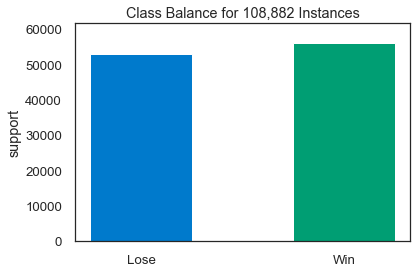

<AxesSubplot: title={'center': 'Class Balance for 108,882 Instances'}, ylabel='support'>

In [199]:
# Instantiating the visualizer object
visualizer = ClassBalance(labels=["Lose", "Win"], colors=["#007acc", "#009e73"])

# Fitting the target data to object
visualizer.fit(y_train['Win'])
visualizer.show()

The count seems pretty similar. No need for resampling.

## Classification Models 

**Logistic Regression**

Best parameter:  {'solver': 'newton-cg'}
Best score:  0.7227364837577832


              precision    recall  f1-score   support

        Lose       0.68      0.53      0.59        40
         Win       0.47      0.63      0.54        27

    accuracy                           0.57        67
   macro avg       0.57      0.58      0.57        67
weighted avg       0.59      0.57      0.57        67



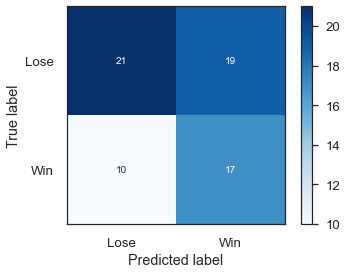

In [160]:
# Instantiating the logistic Regression Model and defining the hyperparameters grid
LR= LogisticRegression(max_iter=1000000, tol =0.2)

# Defining the tuning parameters 
parameters = {'solver'  : ['lbfgs', 'liblinear','newton-cg','sag','saga']
             }

# Tuning the model using GridSearchCV with CV 10 
LR_tuned = GridSearchCV(LR,                        # model
                       param_grid = parameters,   # hyperparameters
                       scoring='accuracy',        # metric for scoring
                        cv=10)   

# Fitting the RandomOverSampled training data to the tuned model
LR_tuned.fit(X_train,y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameter: ", LR_tuned.best_params_)
print("Best score: ", LR_tuned.best_score_)

# Getting predictions on the test set using the tuned model
LR_best_estimator = LR_tuned.best_estimator_         # getting the best estimator from GridSearchCV
y_pred_LR_tuned = LR_best_estimator.predict(X_test)  # getting the predicted classes for X_test

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_LR_tuned, digits= 2, target_names=['Lose', 'Win']))

# Calculating the confusion matrix for the LR tuned
cm_LR_tuned = confusion_matrix(y_test, y_pred_LR_tuned)

# Creating a ConfusionMatrixDisplay object 
display_cm_LR_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_LR_tuned, display_labels=['Lose', 'Win'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_LR_tuned.plot(cmap='Blues')
plt.grid(False)

**Observations**: 

- Based on the classification report above , the model appears to have moderate performance in predicting whether a team will "Win" or "Lose". The precision for "Lose" is 0.68, meaning that when the model predicts a team will lose, it is correct 68% of the time. However, the recall for "Lose" is 0.53, meaning that the model only correctly identifies 53% of the teams that actually lose. The precision for "Win" is lower at 0.47, indicating that when the model predicts a team will win, it is only correct 47% of the time. However, the recall for "Win" is higher at 0.63, meaning that the model correctly identifies 63% of the teams that actually win.

- The F1-score is a weighted average of precision and recall, and it is used to evaluate the model's overall performance. In this case, the F1-score is 0.59 for "Lose" and 0.54 for "Win", indicating that the model has moderate performance for both classes but has more trouble identifying the `Win` class. 

- The accuracy of the model is 0.57 and could be improved using more appropriate models

**Gaussian Naive Bayes**

Best parameters:  {'var_smoothing': 1e-08}
Best score:  0.7086845043252231


              precision    recall  f1-score   support

        Lose       0.61      0.57      0.59        40
         Win       0.41      0.44      0.43        27

    accuracy                           0.52        67
   macro avg       0.51      0.51      0.51        67
weighted avg       0.53      0.52      0.52        67



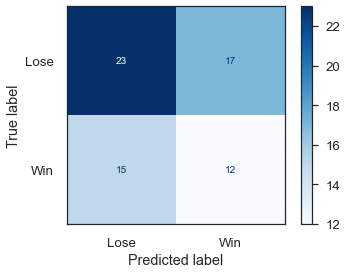

In [161]:
# Instantiating a Gaussian Naive Bayes model and setting up the parameter grid
GNB = GaussianNB()
parameters = {
    'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001]
}

# Creating the GridSearchCV object with cross validation 10
GNB_tuned = GridSearchCV(GNB, parameters, cv=10, scoring='accuracy')

# Fitting the GridSearchCV object to the data
GNB_tuned.fit(X_train, y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameters: ", GNB_tuned.best_params_)
print("Best score: ", GNB_tuned.best_score_)

# Getting the best estimator
GNB_best_estimator = GNB_tuned.best_estimator_

# Using the best estimator to make predictions on the test set
y_pred_GNB_tuned = GNB_best_estimator.predict(X_test)

# Printing the classification report 
print("\n")
print(classification_report(y_test, y_pred_GNB_tuned, digits=2, target_names=['Lose', 'Win']))

# Creating a ConfusionMatrixDisplay object
cm_GNB_tuned = confusion_matrix(y_test,y_pred_GNB_tuned)

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_GNB_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_GNB_tuned, display_labels=['Lose', 'Win'])
display_cm_GNB_tuned.plot(cmap='Blues')
plt.grid(False)

**Observations**: 

- Compared to the previous model, the precision and recall values for both classes have decreased in this model. The F1-score for the "Lose" class remains similar, but it has decreased for the "Win" class. 

- The overall accuracy has also decreased in this model.These metrics suggest that this model is performing worse than the previous one.

**Random Forest Classifier** 

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Best Model Train Accuracy:  0.7428776106243457
Best Model Test Accuracy:  0.6119402985074627


              precision    recall  f1-score   support

        Lose       0.69      0.62      0.66        40
         Win       0.52      0.59      0.55        27

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.60        67
weighted avg       0.62      0.61      0.62        67



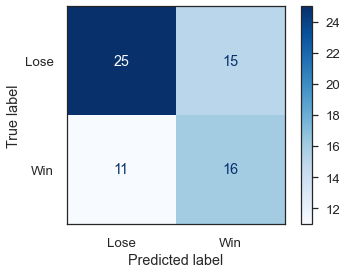

In [16]:
# Creating a new RandomForestClassifier with default parameters
seed = 17
RFC = RandomForestClassifier(random_state=seed)

# Defining parameter grid
parameters = {'max_depth': [10,30,50], 
              'n_estimators': [50, 100, 150],
              'max_features': ('sqrt','log2')
             }

# Performing grid search using 10-fold CV
RFC_tuned = GridSearchCV(RFC, parameters, cv=10)

# Fitting the grid search to the data
RFC_tuned.fit(X_train, y_train.values.ravel())

# Print the best parameters
print("Best Parameters: ", RFC_tuned.best_params_ )

# Creating a new RandomForestClassifier with the best parameters
RFC_best = RandomForestClassifier(n_estimators=RFC_tuned.best_params_['n_estimators'], 
                                   max_depth=RFC_tuned.best_params_['max_depth'], 
                                   max_features=RFC_tuned.best_params_['max_features'], 
                                   random_state=seed)

# Fitting the classifier to the data
RFC_best.fit(X_train, y_train.values.ravel())

# Printing train and test accuracy scores
train_accuracy_rfc_best = RFC_best.score(X_train, y_train)
print("Best Model Train Accuracy: ", train_accuracy_rfc_best)

test_accuracy_rfc_best = RFC_best.score(X_test, y_test)
print("Best Model Test Accuracy: ", test_accuracy_rfc_best)

# Predicting test set results
y_pred_RFC = RFC_best.predict(X_test)

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_RFC, digits=2, target_names=['Lose', 'Win']))

# Calculating the confusion matrix for the RFC model
cm_RFC = confusion_matrix(y_test, y_pred_RFC)

# Creating a ConfusionMatrixDisplay object 
display_cm_RFC = ConfusionMatrixDisplay(confusion_matrix=cm_RFC, display_labels=['Lose', 'Win'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_RFC.plot(cmap='Blues')
plt.grid(False)

**Observations**: 

- Compared to the previous two models, your random forest classifier appears to perform better in terms of overall accuracy, precision, recall, and F1-score. It has an accuracy of 0.61, which is higher than the previous two models, indicating that it is better at predicting the outcomes. The precision and recall scores for both classes have also improved, indicating that the classifier is better at identifying both win and loss outcomes. The F1-score naturally for both classes has also increased, indicating that the classifier is better at achieving a balance between precision and recall. Therefore, the random forest classifier seems to be the best model for predicting the outcomes so far.

**XGBoost Classifier**

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


              precision    recall  f1-score   support

        Lose       0.77      0.60      0.68        40
         Win       0.56      0.74      0.63        27

    accuracy                           0.66        67
   macro avg       0.66      0.67      0.66        67
weighted avg       0.69      0.66      0.66        67



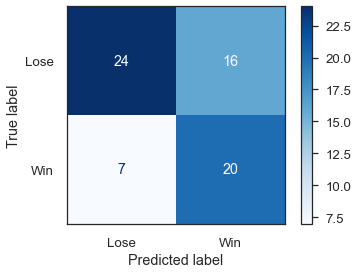

In [18]:
# Defining the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=seed)

# Defining the hyperparameters to tune and their values
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Using GridSearchCV to find the best hyperparameters
xgb_tuned = GridSearchCV(xgb_clf, parameters, cv=10)
xgb_tuned.fit(X_train, y_train.values.ravel())

# Getting the best hyperparameters and fit the classifier with them
best_params = xgb_tuned.best_params_
xgb_best = xgb.XGBClassifier(**best_params, random_state=seed)
xgb_best.fit(X_train, y_train.values.ravel())

# Printing the best parameter with its associated score
print("Best parameters: ", best_params)

# Making predictions on test data
y_pred_xgb = xgb_best.predict(X_test)

# Printing classification report 
print("\n")
print(classification_report(y_test, y_pred_xgb, digits=2, target_names=['Lose', 'Win']))

# Calculating the confusion matrix for the RFC model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Creating a ConfusionMatrixDisplay object 
display_cm_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Lose', 'Win'])

# Plotting the confusion matrix using ConfusionMatrixDisplay object
display_cm_xgb.plot(cmap='Blues')
plt.grid(False)

**Observations**: 

- In terms of accuracy, the XGBoost classifier performed better among all models with an accuracy of 0.66. 


- The f-1 scores also show that this model is doing better at predicting both classes compared to the other three models. 


- The f-1 score for the `Lose` class is 0.68 compared to 0.63 for the `Win` class, showing that the latter class still has some difficulty being predicted.

- Overall, compared to the previous models, our XGboost classifier seems to perform better. It has higher accuracy, precision, recall, and F1-score for both 'Lose' and 'Win' classes, indicating a better ability to correctly classify instances.

### ROC and AUC 

For this next part, we are going to compare all four classifiers using anoter model selection metric: ROC and AUC.

In [162]:
# Storing the values in different variables so we can graph them 

# Logistic Regression
lr_auc= roc_auc_score(y_test, LR_best_estimator.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, LR_best_estimator.predict_proba(X_test)[:, 1])

# Gaussian Naive Bayes  
gnb_auc = roc_auc_score(y_test, GNB_best_estimator.predict_proba(X_test)[:, 1])
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(y_test, GNB_best_estimator.predict_proba(X_test)[:, 1])

# Random forest Classifier
rfc_auc = roc_auc_score(y_test, RFC_best.predict_proba(X_test)[:, 1])
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, RFC_best.predict_proba(X_test)[:, 1])

# XGBoost Classifier
xgb_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_best.predict_proba(X_test)[:, 1])

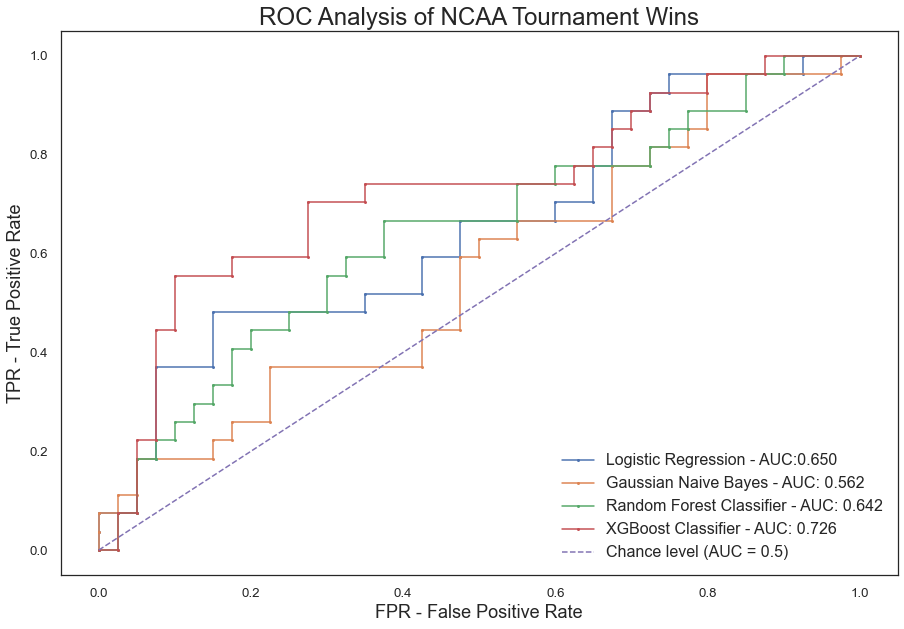

In [163]:
# Using the values to plot ROC for all four models 
plt.figure(figsize=(15, 10))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression - AUC:%.3f' % lr_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes - AUC: %.3f' % gnb_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier - AUC: %.3f' % rfc_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost Classifier - AUC: %.3f' % xgb_auc)
plt.plot([0, 1], [0, 1], "--", label="Chance level (AUC = 0.5)")
plt.xlabel('FPR - False Positive Rate', fontsize=18)
plt.ylabel('TPR - True Positive Rate', fontsize=18)
plt.title('ROC Analysis of NCAA Tournament Wins',  fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(False)
plt.show()

**Observations and Model Selection**

- Based on the ROC curve analysis, it appears that the **XGBoost Classifier** has the highest AUC value of 0.726, indicating that it has the best overall performance in distinguishing between `Win` and `Lose` during the NCAA Tournament. 


- The Logistic Regression has an AUC value of 0.650, the Naive Bayes 0.562 and the Random Forect Classifier 0.642. 


- Additionally, the classification reports above shows that the **XGBoost Classifier** achieved the highest precision, recall, and F1-score for the positive class (`Win`) and also the negative one (`Lose`) compared to all other models. 


- Therefore, we can select **XGBoost** as the best model for predicting which team wins each round of the tournament bracket. In addition to being the best model, it is also worthy to note that this model is computationally very efficient. 

### Additional Work

Now that we have our best model, we will apply it to the `predictions_df` dataframe. As a reminder, this dataframe contains all potential game matchups for the teams that qualified this year 2023. We will see what would have been the tournament outcome, just based on our model. The brackets are shown in the final presentation. 

In [200]:
# Reading dataset  
predictions_df.head()

# Dropping 'Win' column . It currently has NaN. We will predict this column 
predictions_df = predictions_df.drop(['Win'], axis = 1)

In [202]:
# Creating a new dataframe with the features we used to train the model
predictions_X = predictions_df.drop(['A_TeamName', 'B_TeamName', 'TeamA', 'TeamB', 'Season'], axis = 1)

# Making predictions on the new data using the XGBoost model
predictions_y = xgb_best.predict(predictions_X)

# Converting y_pred into a pandas DataFrame
Win_pred = pd.DataFrame(predictions_y, columns=['Win_predicted'])
Win_pred

# Resetting the index of train_dataset
predictions_df.reset_index(drop=True, inplace=True)

# Concatenating the two dataframes
results_df = pd.concat([predictions_df, Win_pred], axis=1)
results_df


,Season,TeamA,TeamB,A_PPG,A_FG%,A_FG3%,A_FT%,A_OR_per_game,A_DR_per_game,A_Ast_per_game,A_TO_per_game,A_Stl_per_game,A_Blk_per_game,A_PF_per_game,A_Road_Wins,A_ConfAbbrev,A_TeamName,A_TotalD1Seasons,A_Seed,A_CoachName,B_PPG,B_FG%,B_FG3%,B_FT%,B_OR_per_game,B_DR_per_game,B_Ast_per_game,B_TO_per_game,B_Stl_per_game,B_Blk_per_game,B_PF_per_game,B_Road_Wins,B_ConfAbbrev,B_TeamName,B_TotalD1Seasons,B_Seed,B_CoachName,Win_predicted
0,2023,1112,1104,2.294100,2.432960,1.285169,0.253643,-0.769639,1.631436,2.814605,-0.134445,-0.299628,-0.220292,-0.513580,1.736026,26,Arizona,0.469946,24,918,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677,1
1,2023,1113,1104,0.044457,-1.056092,-1.170610,-0.253057,-0.769639,0.147951,0.530414,-0.674270,0.471647,1.432086,0.323883,1.511409,26,Arizona St,0.469946,78,84,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677,0
2,2023,1116,1104,0.740953,1.642745,-0.817709,-0.253057,-0.769639,0.147951,0.005234,-0.134445,1.155841,1.432086,0.323883,-0.023375,28,Arkansas,0.469946,74,293,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677,0
3,2023,1120,1104,0.567205,0.087397,-1.170610,-0.001433,-0.287785,-0.361512,0.530414,-0.674270,1.155841,1.432086,0.323883,-0.023375,28,Auburn,0.469946,53,114,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677,0
4,2023,1124,1104,1.260746,0.473017,0.936317,1.308424,-0.287785,-1.941152,0.530414,-0.674270,0.471647,-1.284653,-0.513580,0.532430,9,Baylor,0.469946,25,814,2.031351,0.470164,-0.123021,0.790668,0.207381,3.042121,0.993588,0.374850,-0.342431,1.372325,0.303488,1.953690,28,Alabama,0.480045,23,677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2023,1452,1436,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458,0
2274,2023,1462,1436,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,0.377992,1.203386,0.572749,0.002710,-2.617801,-0.321458,0.506060,-2.713961,-0.342431,-0.198959,-1.224722,1.068971,4,Vermont,0.480045,19,458,1
2275,2023,1452,1438,1.087720,0.473017,0.236717,1.039560,-0.287785,-0.879176,0.005234,-0.674270,0.471647,-0.220292,-0.116558,-0.023375,9,West Virginia,0.469946,31,71,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917,0
2276,2023,1462,1438,1.950542,2.036834,1.981063,0.253643,-0.769639,1.144033,2.814605,-0.674270,0.471647,-0.220292,-0.869405,1.040021,5,Xavier,0.469946,47,823,-0.294827,0.470164,0.224934,0.002710,-1.729036,-0.321458,1.460185,-3.487948,0.448933,0.659154,-1.504515,1.068971,3,Virginia,0.480045,26,917,1


In [203]:
# Reading it out into a csv file. 
results_df.to_csv('data/tourney_matchups_predicted_results.csv', index=False)

Now that we have all predictions, let's see what a bracket using our model would look like. We will show this during the presentation in class and please refer to the powerpoint slides to see how XGBoost Classifier brackets did 

### Discussions, Conclusions and Future work

**Conclusion and Discussions:**

- In order to answer our two questions, we trained four different classification models: Logistic Regression, Gaussian Naive Bayes, Random Forest Classifier, and XGBoost Classifier. Based on the results obtained from the analysis, it is clear that the XGBoost classifier performed the best in predicting both which teams will make it to the 2023 tournament and which teams will win each tournament bracket game. This result indicates that the XGBoost model was better at capturing the underlying patterns in the data and was more accurate in making predictions compared to the other models used.


- Furthermore, the feature importance analysis revealed that road wins, field goal percentage, and assists per game were the most important features in predicting whether a team would qualify for the tournament and/or win games in the bracket. This highlights the importance of these statistics in evaluating a team's potential performance and could be helpful for coaches and analysts when selecting and strategizing for games. In addition to these variables, we also used Conference Affiliation and Coach Names as categorical predictor. However, we found that Conference Affiliation played a more important role in predicting team performance and tournament outcomes compared to Coach Names. This aligns with previous analysis and visualization that has shown the significance of conference affiliation in predicting team success.

**Limitations and Future Work:**

- As for the limitations of these questions, one important factor to consider is the availability and quality of the data used. Although the dataset used in this study was comprehensive and up-to-date, there may be other important factors that were not captured in the dataset such as individual player statistics, game strategy and so on. Additionally, the absence of 2020 data due to the COVID-19 pandemic could have limited the generalizability of some of our findings.


- While the current analysis focused on several key variables such as road wins, field goal percentage, and assist per game, there are likely other factors that can contribute to a team's success in the tournament. For future work, it would be valuable to explore additional variables such as individual player statistics, team chemistry, and game strategy. For instance, individual player statistics such as which players play and/or for how long that player plays could provide insights into individual player performance and how it relates to team success. Additionally, exploring team chemistry (how well players work together) and analyzing game strategy and how it changes throughout the tournament could provide valuable information on the types of tactics that are most effective in tournament play.


- Overall, by exploring additional variables beyond those analyzed in this project, it may be possible to develop more accurate models for predicting team success in the tournament. This could be particularly important for coaches and teams looking to improve their chances of success in the tournament, as well as for fans and analysts looking to make informed predictions about tournament outcomes.

### References 

1. Prof Gongora‑Svartzman : EDA lectures, Fall 2022, Heinz College, Carnegie Mellon University 
2. Prof Gongora‑Svartzman: MLFP lectures and Lab, Spring 2023, Heinz College, Carnegie Mellon University 
3. Prof Martin Barrett: Intermediate Programming with Python lecture slides, Fall 2022, Heinz College, Carnegie Mellon University 
4. XGBoost Classifier Model : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
5. Itertool Combinations: https://docs.python.org/3/library/itertools.html